![imagen](./img/ejercicios.png)

# INFORMACIÓN DEL PROYECTO

### TÍTULO

## "Niche is Nice! Making a successful indie game."

### TEMA

# un analysis de ventas de videojuegos buscando patrones

### HIPÓTESIS
# Publicacion de un genero de videojuego tiene correlacion negativa con ventas totales en relacion con la frequencia de publicaciones de ese genero en un periodo de tiempo (semanas -> meses)

Define aquí lo que será la hipótesis de tu proyecto.
Deberás tener más de una, pero tu proyecto lo harás teniendo una principal hipótesis.

# Escribe tu hipótesis principal en Markdown
hipotesis_1 = ""

# Escribe más hipótesis si las hubiera en Markdown
# hipotesis_2 = "Games have sales equal to their reviews times 50"
# hipotesis_3 = "Games with high number of positive reviews gain 30% more sales"
# hipotesis_4 = "User reviews matter more than critic reviews"


## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

Incluye aquí una vista del dataset o datasets de los que partirás para poder evaluar tu hipótesis. <br>
También incluye el origen de estos datos y su fuente.

In [2]:
import pandas as pd
import numpy as np

df_1 = pd.DataFrame()
fuente_1 = "vgsales.csv"
df_2 = pd.DataFrame()
fuente_2 = "metacritic_scores.csv"

In [3]:
#METACRITIC_REVIEWS conseguido con Selenium
"https://www.metacritic.com/browse/game/?releaseYearMin=1958&releaseYearMax=2025&platform=ps5&platform=xbox-series-x&platform=pc&platform=dreamcast&platform=ds&platform=mobile&platform=gamecube&platform=meta-quest&platform=nintendo-64&platform=ps1&platform=nintendo-switch&platform=3ds&platform=gba&platform=ps3&platform=ps2&platform=ps4&platform=psp&platform=ps-vita&platform=wii&platform=wii-u&platform=xbox&platform=xbox-360&platform=xbox-one&page=1"

'https://www.metacritic.com/browse/game/?releaseYearMin=1958&releaseYearMax=2025&platform=ps5&platform=xbox-series-x&platform=pc&platform=dreamcast&platform=ds&platform=mobile&platform=gamecube&platform=meta-quest&platform=nintendo-64&platform=ps1&platform=nintendo-switch&platform=3ds&platform=gba&platform=ps3&platform=ps2&platform=ps4&platform=psp&platform=ps-vita&platform=wii&platform=wii-u&platform=xbox&platform=xbox-360&platform=xbox-one&page=1'

In [4]:
#KAGGLE DATASET
"https://www.kaggle.com/code/snanilim/video-games-sales-analysis-and-visualization"

'https://www.kaggle.com/code/snanilim/video-games-sales-analysis-and-visualization'

In [5]:

# guarda en variables los datasets y su fuente
df_1 = pd.read_csv(fuente_1)
#df_1 = pd.DataFrame()
df_2 = pd.read_csv(fuente_2)
# df_3 = pd.DataFrame()
# fuente_3 = ""
# df_4 = pd.DataFrame()
# fuente_4 = ""
# df_5 = pd.DataFrame()
# fuente_5 = ""
# ...

Muestra mediante un head() los principales datasets con los que vas a trabajar

In [6]:
# Primer dataset
df_1.head()


Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [7]:
df_1.shape[0]

16598

In [8]:
# Siguiente dataset...
df_2.head()


Unnamed: 0                                    Title  \
0           0                       1. Baldur's Gate 3   
1           1  2. The Legend of Zelda: Ocarina of Time   
2           2              3. Tony Hawk's Pro Skater 2   
3           3                   4. Grand Theft Auto IV   
4           4                           5. SoulCalibur   

               Release Date Score  
0   DEC 8, 2023  •  Rated M    99  
1  NOV 23, 1998  •  Rated E    99  
2  SEP 20, 2000  •  Rated T    98  
3  APR 29, 2008  •  Rated M    98  
4   SEP 8, 1999  •  Rated T    98

In [9]:
df_2.shape[0]

14826

In [10]:
#Datasets para el futuro:
"https://www.kaggle.com/datasets/hosammhmdali/video-game-sales-2024"
"https://rapidapi.com/opencritic-opencritic-default/api/opencritic-api"
"https://steamapi.xpaw.me/"
"Getting Started – IGDB API docs"
"The Biggest Video Game Database on RAWG - Video Game Discovery Service"

'The Biggest Video Game Database on RAWG - Video Game Discovery Service'

In [11]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## ++ Missing some key valyes in release year, hopefully the second dataset will cover that section.
## ++ Also missing some publishers, but the amount is fortunately tiny!

In [12]:
df_1.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

In [13]:
df_1.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [14]:
df_1.duplicated(subset=["Name"])

0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594     True
16595     True
16596    False
16597     True
Length: 16598, dtype: bool

In [15]:
df_1.loc[df_1.duplicated(subset=["Name"])]




Rank                                              Name Platform  \
23        24                                Grand Theft Auto V     X360   
35        36                        Call of Duty: Black Ops II     X360   
37        38                    Call of Duty: Modern Warfare 3      PS3   
40        41                           Call of Duty: Black Ops      PS3   
44        45                                Grand Theft Auto V      PS4   
...      ...                                               ...      ...   
16586  16589                    Secret Files 2: Puritas Cordis       DS   
16591  16594                               Myst IV: Revelation       PC   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16597  16600                                  Spirits & Spells      GBA   

         Year      Genre             Publisher  NA_Sales  EU_Sales  JP_Sales  \
23     2013.0     Action  Take-Two Interactive      9.63      5.31      0.06   
35     2012.0    Shooter            Activision      8.25      4.30      0.07   
37     2011.0    Shooter            Activision      5.54      5.82      0.49   
40     2010.0    Shooter            Activision      5.98      4.44      0.48   
44     2014.0     Action  Take-Two Interactive      3.80      5.81      0.36   
...       ...        ...                   ...       ...       ...       ...   
16586  2009.0  Adventure           Deep Silver      0.00      0.01      0.00   
16591  2004.0  Adventure               Ubisoft      0.01      0.00      0.00   
16594  2003.0    Shooter            Infogrames      0.01      0.00      0.00   
16595  2008.0     Racing            Activision      0.00      0.00      0.00   
16597  2003.0   Platform               Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
23            1.38         16.38  
35            1.12         13.73  
37            1.62         13.46  
40            1.83         12.73  
44            2.02         11.98  
...            ...           ...  
16586         0.00          0.01  
16591         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16597         0.00          0.01  

[5105 rows x 11 columns]

In [16]:
Same_name = df_1.loc[df_1.duplicated(subset=["Name"])]
Same_name.loc[df_1.duplicated(subset=["Platform"])]


Rank                                              Name Platform  \
23        24                                Grand Theft Auto V     X360   
35        36                        Call of Duty: Black Ops II     X360   
37        38                    Call of Duty: Modern Warfare 3      PS3   
40        41                           Call of Duty: Black Ops      PS3   
44        45                                Grand Theft Auto V      PS4   
...      ...                                               ...      ...   
16586  16589                    Secret Files 2: Puritas Cordis       DS   
16591  16594                               Myst IV: Revelation       PC   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16597  16600                                  Spirits & Spells      GBA   

         Year      Genre             Publisher  NA_Sales  EU_Sales  JP_Sales  \
23     2013.0     Action  Take-Two Interactive      9.63      5.31      0.06   
35     2012.0    Shooter            Activision      8.25      4.30      0.07   
37     2011.0    Shooter            Activision      5.54      5.82      0.49   
40     2010.0    Shooter            Activision      5.98      4.44      0.48   
44     2014.0     Action  Take-Two Interactive      3.80      5.81      0.36   
...       ...        ...                   ...       ...       ...       ...   
16586  2009.0  Adventure           Deep Silver      0.00      0.01      0.00   
16591  2004.0  Adventure               Ubisoft      0.01      0.00      0.00   
16594  2003.0    Shooter            Infogrames      0.01      0.00      0.00   
16595  2008.0     Racing            Activision      0.00      0.00      0.00   
16597  2003.0   Platform               Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
23            1.38         16.38  
35            1.12         13.73  
37            1.62         13.46  
40            1.83         12.73  
44            2.02         11.98  
...            ...           ...  
16586         0.00          0.01  
16591         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16597         0.00          0.01  

[5102 rows x 11 columns]

In [17]:
GTA_repeats_test = df_1.Name.loc[df_1.Name =="Grand Theft Auto V"]
GTA_repeats_test

16      Grand Theft Auto V
23      Grand Theft Auto V
44      Grand Theft Auto V
197     Grand Theft Auto V
1896    Grand Theft Auto V
Name: Name, dtype: object

In [18]:
df_1.loc[df_1["Name"] == "Grand Theft Auto V" ]

Rank                Name Platform    Year   Genre             Publisher  \
16      17  Grand Theft Auto V      PS3  2013.0  Action  Take-Two Interactive   
23      24  Grand Theft Auto V     X360  2013.0  Action  Take-Two Interactive   
44      45  Grand Theft Auto V      PS4  2014.0  Action  Take-Two Interactive   
197    198  Grand Theft Auto V     XOne  2014.0  Action  Take-Two Interactive   
1896  1898  Grand Theft Auto V       PC  2015.0  Action  Take-Two Interactive   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
16        7.01      9.27      0.97         4.14         21.40  
23        9.63      5.31      0.06         1.38         16.38  
44        3.80      5.81      0.36         2.02         11.98  
197       2.66      2.01      0.00         0.41          5.08  
1896      0.36      0.64      0.00         0.08          1.08

In [19]:
df_1["Genre"].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

<Axes: xlabel='Year'>

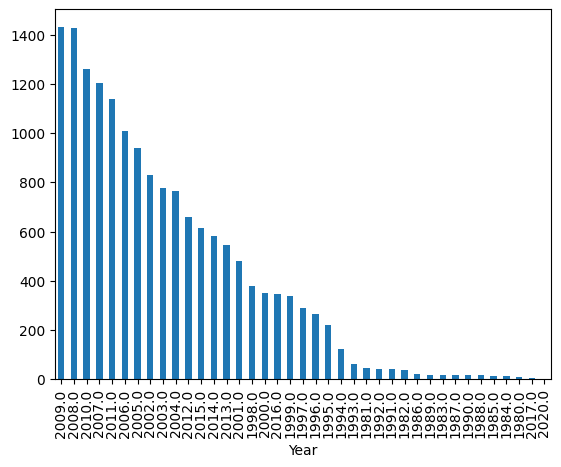

In [20]:
Games_released_Year = df_1["Year"].value_counts()
Games_released_Year.plot(kind="bar")

<Axes: xlabel='Year'>

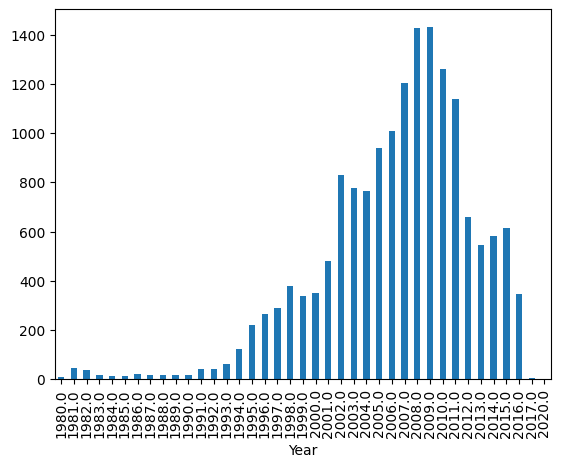

In [21]:
Games_released_timeline = Games_released_Year.sort_index()
Games_released_timeline.plot(kind="bar")

<Axes: xlabel='Year,Genre'>

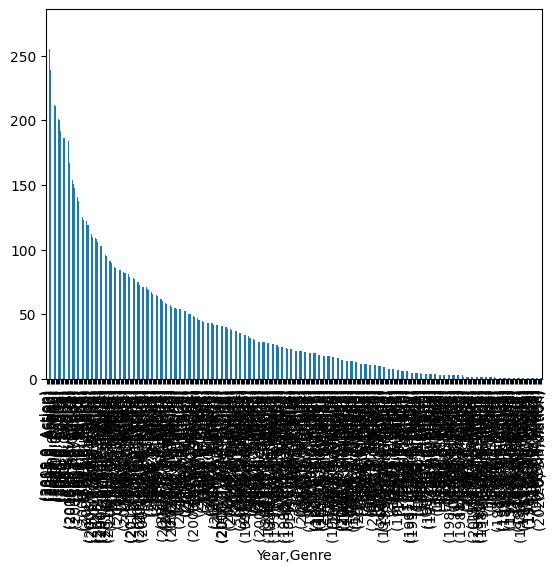

In [22]:
Genre_by_year = df_1[["Year","Genre"]].value_counts()
Genre_by_year.plot(kind="bar")

In [23]:
type(Genre_by_year)

pandas.core.series.Series

In [24]:
Genre_by_year.index

MultiIndex([(2009.0,     'Action'),
            (2012.0,     'Action'),
            (2015.0,     'Action'),
            (2011.0,     'Action'),
            (2010.0,     'Action'),
            (2008.0,     'Action'),
            (2008.0,       'Misc'),
            (2007.0,     'Action'),
            (2009.0,       'Misc'),
            (2010.0,       'Misc'),
            ...
            (1987.0,  'Adventure'),
            (1983.0,  'Adventure'),
            (1984.0,     'Action'),
            (1983.0,     'Sports'),
            (1983.0,    'Shooter'),
            (1983.0,     'Puzzle'),
            (1984.0,   'Platform'),
            (1984.0,       'Misc'),
            (2017.0,     'Action'),
            (2020.0, 'Simulation')],
           names=['Year', 'Genre'], length=389)

<Axes: xlabel='Year'>

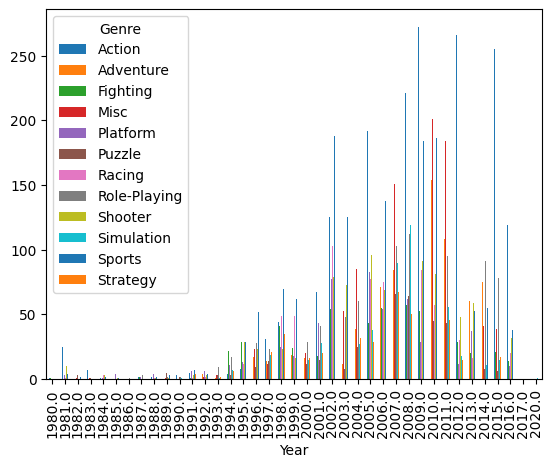

In [25]:
Genre_by_Year2 = df_1.pivot_table(index="Year", columns="Genre", aggfunc='size', fill_value=0)
Genre_by_Year2.sort_index()
Genre_by_Year2.plot(kind="bar")



In [26]:
Genre_by_Year2

Genre   Action  Adventure  Fighting  Misc  Platform  Puzzle  Racing  \
Year                                                                  
1980.0       1          0         1     4         0       0       0   
1981.0      25          0         0     0         3       2       1   
1982.0      18          0         0     1         5       3       2   
1983.0       7          1         0     1         5       1       0   
1984.0       1          0         0     1         1       3       3   
1985.0       2          0         1     0         4       4       0   
1986.0       6          0         0     0         6       0       1   
1987.0       2          1         2     0         2       0       0   
1988.0       2          0         0     0         4       1       1   
1989.0       2          0         0     1         3       5       0   
1990.0       3          0         0     0         3       2       2   
1991.0       5          2         1     1         6       4       1   
1992.0       1          4         7     2         6       5       2   
1993.0       6          1        11     3        11       3       2   
1994.0       4          4        22     6        11       3       8   
1995.0       8         13        29    22        13      12      12   
1996.0      20         17        30    23        14       9      22   
1997.0      31         14        28    12        18      14      36   
1998.0      44         23        41    22        25      13      49   
1999.0      40         19        24    25        18       6      49   
2000.0      44         16        29    20        24      12      43   
2001.0      67         21        18    26        43      15      71   
2002.0     125         42        54    45        77      20     103   
2003.0     144         12        44    53        87       8     109   
2004.0     125         39        39    85        66      25      71   
2005.0     192         42        43   115        83      33      77   
2006.0     184         71        55   109        54      43      75   
2007.0     211         84        50   151        42      66      86   
2008.0     221        166        57   212        62      64      82   
2009.0     272        141        53   207        29      79      84   
2010.0     226        154        40   201        31      45      57   
2011.0     239        108        50   184        37      43      65   
2012.0     266         58        29    38        12      11      30   
2013.0     148         60        20    42        37       3      16   
2014.0     186         75        23    41        10       8      27   
2015.0     255         54        21    39        14       6      19   
2016.0     119         34        14    18        10       0      20   
2017.0       1          0         0     0         0       0       0   
2020.0       0          0         0     0         0       0       0   

Genre   Role-Playing  Shooter  Simulation  Sports  Strategy  
Year                                                         
1980.0             0        2           0       1         0  
1981.0             0       10           1       4         0  
1982.0             0        5           0       2         0  
1983.0             0        1           0       1         0  
1984.0             0        3           0       2         0  
1985.0             0        1           1       1         0  
1986.0             1        4           0       3         0  
1987.0             3        2           0       4         0  
1988.0             3        1           1       2         0  
1989.0             2        1           0       3         0  
1990.0             2        0           1       3         0  
1991.0             5        3           2       7         4  
1992.0             5        3           1       4         3  
1993.0             9        2           1       9         2  
1994.0            17       11           7      22         6  
1995.0            24       29     

<Axes: xlabel='Year'>

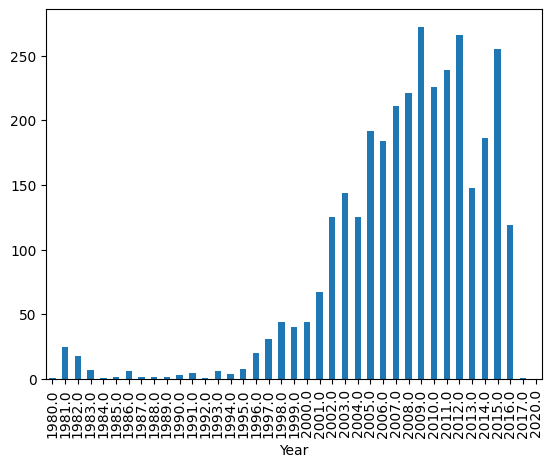

In [27]:
Genre_by_Year2["Action"].plot(kind="bar")


<Axes: xlabel='Year'>

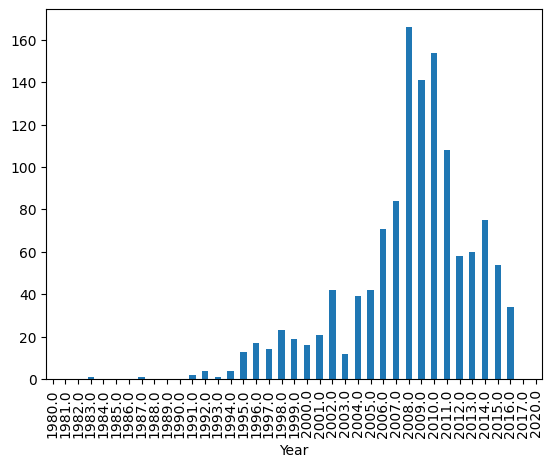

In [28]:
Genre_by_Year2["Adventure"].plot(kind="bar")

<Axes: xlabel='Year'>

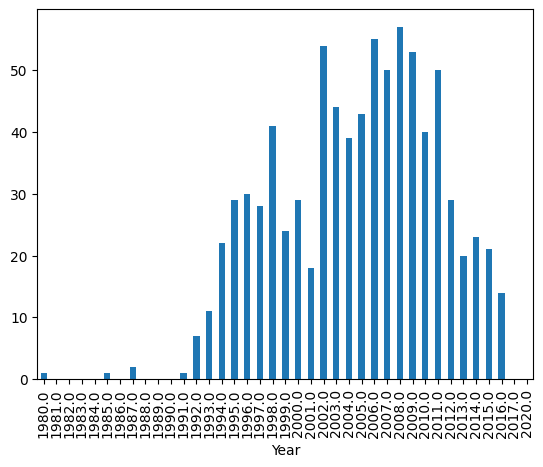

In [29]:
Genre_by_Year2["Fighting"].plot(kind="bar")

<Axes: xlabel='Year'>

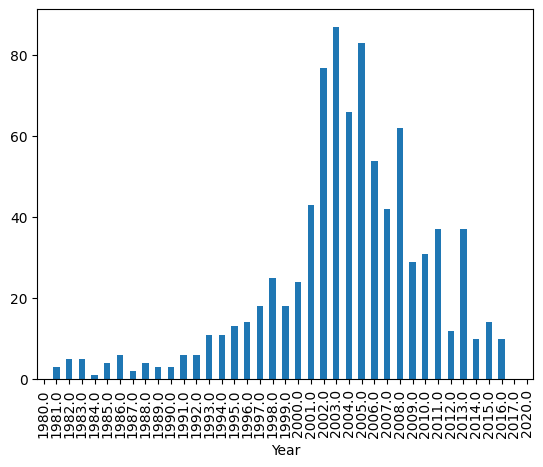

In [30]:
Genre_by_Year2["Platform"].plot(kind="bar")

<Axes: xlabel='Year'>

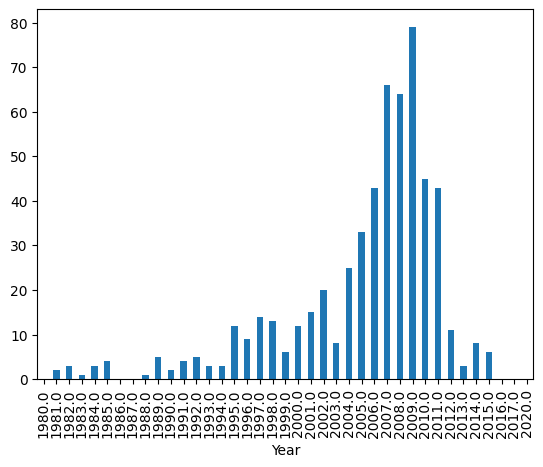

In [31]:
Genre_by_Year2["Puzzle"].plot(kind="bar")

In [32]:
type(Games_released_timeline)

pandas.core.series.Series

In [33]:
Genre_by_Year2["Total_Games"] = Games_released_timeline

In [34]:
Genre_by_Year2

Genre   Action  Adventure  Fighting  Misc  Platform  Puzzle  Racing  \
Year                                                                  
1980.0       1          0         1     4         0       0       0   
1981.0      25          0         0     0         3       2       1   
1982.0      18          0         0     1         5       3       2   
1983.0       7          1         0     1         5       1       0   
1984.0       1          0         0     1         1       3       3   
1985.0       2          0         1     0         4       4       0   
1986.0       6          0         0     0         6       0       1   
1987.0       2          1         2     0         2       0       0   
1988.0       2          0         0     0         4       1       1   
1989.0       2          0         0     1         3       5       0   
1990.0       3          0         0     0         3       2       2   
1991.0       5          2         1     1         6       4       1   
1992.0       1          4         7     2         6       5       2   
1993.0       6          1        11     3        11       3       2   
1994.0       4          4        22     6        11       3       8   
1995.0       8         13        29    22        13      12      12   
1996.0      20         17        30    23        14       9      22   
1997.0      31         14        28    12        18      14      36   
1998.0      44         23        41    22        25      13      49   
1999.0      40         19        24    25        18       6      49   
2000.0      44         16        29    20        24      12      43   
2001.0      67         21        18    26        43      15      71   
2002.0     125         42        54    45        77      20     103   
2003.0     144         12        44    53        87       8     109   
2004.0     125         39        39    85        66      25      71   
2005.0     192         42        43   115        83      33      77   
2006.0     184         71        55   109        54      43      75   
2007.0     211         84        50   151        42      66      86   
2008.0     221        166        57   212        62      64      82   
2009.0     272        141        53   207        29      79      84   
2010.0     226        154        40   201        31      45      57   
2011.0     239        108        50   184        37      43      65   
2012.0     266         58        29    38        12      11      30   
2013.0     148         60        20    42        37       3      16   
2014.0     186         75        23    41        10       8      27   
2015.0     255         54        21    39        14       6      19   
2016.0     119         34        14    18        10       0      20   
2017.0       1          0         0     0         0       0       0   
2020.0       0          0         0     0         0       0       0   

Genre   Role-Playing  Shooter  Simulation  Sports  Strategy  Total_Games  
Year                                                                      
1980.0             0        2           0       1         0            9  
1981.0             0       10           1       4         0           46  
1982.0             0        5           0       2         0           36  
1983.0             0        1           0       1         0           17  
1984.0             0        3           0       2         0           14  
1985.0             0        1           1       1         0           14  
1986.0             1        4           0       3         0           21  
1987.0             3        2           0       4         0           16  
1988.0             3        1           1       2         0           15  
1989.0             2        1           0       3         0           17  
1990.0             2        0           1       3         0           16  
1991.0             5        3           2       7         4           41  
1992.0             5        3         

In [35]:
Percentage_per_year = Genre_by_Year2.loc[:,"Action":"Strategy"].div(Genre_by_Year2["Total_Games"], axis=0)
Percentage_per_year

Genre     Action  Adventure  Fighting      Misc  Platform    Puzzle    Racing  \
Year                                                                            
1980.0  0.111111   0.000000  0.111111  0.444444  0.000000  0.000000  0.000000   
1981.0  0.543478   0.000000  0.000000  0.000000  0.065217  0.043478  0.021739   
1982.0  0.500000   0.000000  0.000000  0.027778  0.138889  0.083333  0.055556   
1983.0  0.411765   0.058824  0.000000  0.058824  0.294118  0.058824  0.000000   
1984.0  0.071429   0.000000  0.000000  0.071429  0.071429  0.214286  0.214286   
1985.0  0.142857   0.000000  0.071429  0.000000  0.285714  0.285714  0.000000   
1986.0  0.285714   0.000000  0.000000  0.000000  0.285714  0.000000  0.047619   
1987.0  0.125000   0.062500  0.125000  0.000000  0.125000  0.000000  0.000000   
1988.0  0.133333   0.000000  0.000000  0.000000  0.266667  0.066667  0.066667   
1989.0  0.117647   0.000000  0.000000  0.058824  0.176471  0.294118  0.000000   
1990.0  0.187500   0.000000  0.000000  0.000000  0.187500  0.125000  0.125000   
1991.0  0.121951   0.048780  0.024390  0.024390  0.146341  0.097561  0.024390   
1992.0  0.023256   0.093023  0.162791  0.046512  0.139535  0.116279  0.046512   
1993.0  0.100000   0.016667  0.183333  0.050000  0.183333  0.050000  0.033333   
1994.0  0.033058   0.033058  0.181818  0.049587  0.090909  0.024793  0.066116   
1995.0  0.036530   0.059361  0.132420  0.100457  0.059361  0.054795  0.054795   
1996.0  0.076046   0.064639  0.114068  0.087452  0.053232  0.034221  0.083650   
1997.0  0.107266   0.048443  0.096886  0.041522  0.062284  0.048443  0.124567   
1998.0  0.116095   0.060686  0.108179  0.058047  0.065963  0.034301  0.129288   
1999.0  0.118343   0.056213  0.071006  0.073964  0.053254  0.017751  0.144970   
2000.0  0.126074   0.045845  0.083095  0.057307  0.068768  0.034384  0.123209   
2001.0  0.139004   0.043568  0.037344  0.053942  0.089212  0.031120  0.147303   
2002.0  0.150784   0.050663  0.065139  0.054282  0.092883  0.024125  0.124246   
2003.0  0.185806   0.015484  0.056774  0.068387  0.112258  0.010323  0.140645   
2004.0  0.163827   0.051114  0.051114  0.111402  0.086501  0.032765  0.093054   
2005.0  0.204038   0.044633  0.045696  0.122210  0.088204  0.035069  0.081828   
2006.0  0.182540   0.070437  0.054563  0.108135  0.053571  0.042659  0.074405   
2007.0  0.175541   0.069884  0.041597  0.125624  0.034942  0.054908  0.071547   
2008.0  0.154762   0.116246  0.039916  0.148459  0.043417  0.044818  0.057423   
2009.0  0.190077   0.098532  0.037037  0.144654  0.020266  0.055206  0.058700   
2010.0  0.179508   0.122319  0.031771  0.159651  0.024623  0.035743  0.045274   
2011.0  0.209833   0.094820  0.043898  0.161545  0.032485  0.037752  0.057068   
2012.0  0.404871   0.088280  0.044140  0.057839  0.018265  0.016743  0.045662   
2013.0  0.271062   0.109890  0.036630  0.076923  0.067766  0.005495  0.029304   
2014.0  0.319588   0.128866  0.039519  0.070447  0.017182  0.013746  0.046392   
2015.0  0.415309   0.087948  0.034202  0.063518  0.022801  0.009772  0.030945   
2016.0  0.345930   0.098837  0.040698  0.052326  0.029070  0.000000  0.058140   
2017.0  0.333333   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2020.0  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Genre   Role-Playing   Shooter  Simulation    Sports  Strategy  
Year                                                            
1980.0      0.000000  0.222222    0.000000  0.111111  0.000000  
1981.0      0.000000  0.217391    0.021739  0.086957  0.000000  
1982.0      0.000000  0.138889    0.000000  0.055556  0.000000  
1983.0      0.000000  0.058824    0.000000  0.058824  0.000000  
1984.0      0.000000  0.214286    0.000000  0.142857  0.000000  
1985.0      0.000000  0.071429    0.071429  0.071429  0.000000  
1986.0      0.047619  0.190476    0.000000  0.142857  0.000000  
1987.0      0.187500  0.125000    0.000000  0.250000  0.000000  
1988.0      0.200000  0.0666

In [36]:
import matplotlib.pyplot as plt

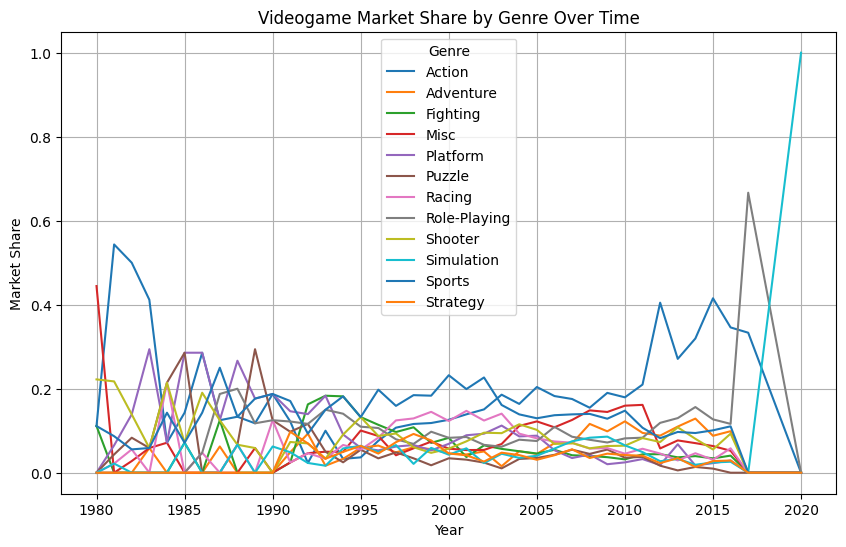

In [37]:
Percentage_per_year.plot(figsize=(10, 6))
plt.title("Videogame Market Share by Genre Over Time")
plt.xlabel("Year")
plt.ylabel("Market Share")
plt.legend(title="Genre")
plt.grid(True)
plt.show()

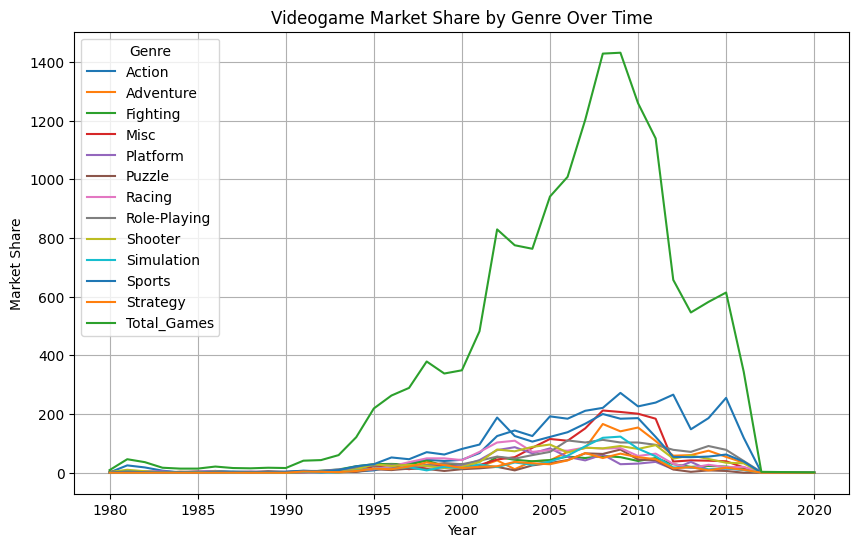

In [38]:
Genre_by_Year2.plot(figsize=(10, 6))
plt.title("Videogame Market Share by Genre Over Time")
plt.xlabel("Year")
plt.ylabel("Market Share")
plt.legend(title="Genre")
plt.grid(True)
plt.show()

In [39]:
Sales_per_year = df_1.groupby("Year")

In [40]:
Sales_per_year = Sales_per_year["Global_Sales"].agg("sum")
Sales_per_year 

Year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    419.31
2005.0    459.94
2006.0    521.04
2007.0    611.13
2008.0    678.90
2009.0    667.30
2010.0    600.45
2011.0    515.99
2012.0    363.54
2013.0    368.11
2014.0    337.05
2015.0    264.44
2016.0     70.93
2017.0      0.05
2020.0      0.29
Name: Global_Sales, dtype: float64

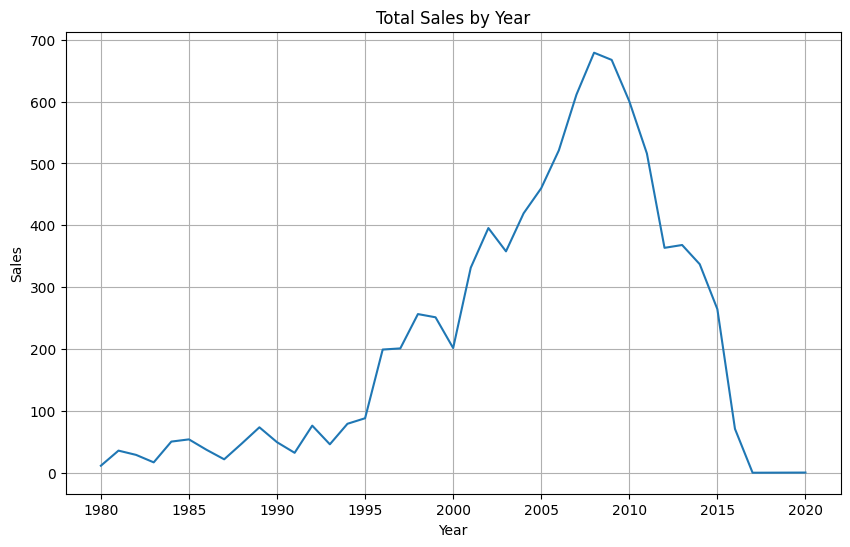

In [41]:
Sales_per_year.plot(figsize=(10,6))
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

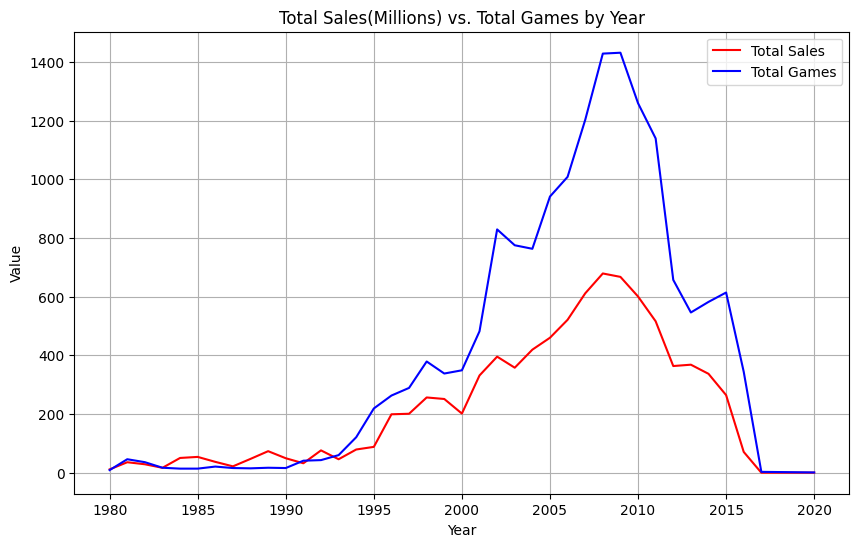

In [201]:
import matplotlib.pyplot as plt

# Suppose you have two Series or DataFrame columns:
#   Sales_per_year  -> total global sales by year
#   Games_per_year  -> total games released by year
# Each indexed by 'Year' or sharing the same index.

plt.figure(figsize=(10, 6))

plt.plot(Sales_per_year.index, Sales_per_year.values, label='Total Sales', color='red')
plt.plot(Genre_by_Year2.index, Genre_by_Year2["Total_Games"].values, label='Total Games', color='blue')

plt.title('Total Sales(Millions) vs. Total Games by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
df_1.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [202]:
df_1["Publisher"].nunique()

578

In [44]:
df_1.dropna(subset=['Year', 'Genre', 'Global_Sales'])

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16327 rows x 11 columns]

In [207]:
df_year_sales = df_1.groupby(['Year']).agg(total_sales=('Global_Sales', 'sum'),games_published=('Name', 'count')).reset_index()
df_year_sales

Year  total_sales  games_published
0   1980.0        11.38                9
1   1981.0        35.77               46
2   1982.0        28.86               36
3   1983.0        16.79               17
4   1984.0        50.36               14
5   1985.0        53.94               14
6   1986.0        37.07               21
7   1987.0        21.74               16
8   1988.0        47.22               15
9   1989.0        73.45               17
10  1990.0        49.39               16
11  1991.0        32.23               41
12  1992.0        76.16               43
13  1993.0        45.98               60
14  1994.0        79.17              121
15  1995.0        88.11              219
16  1996.0       199.15              263
17  1997.0       200.98              289
18  1998.0       256.47              379
19  1999.0       251.27              338
20  2000.0       201.56              349
21  2001.0       331.47              482
22  2002.0       395.52              829
23  2003.0       357.85              775
24  2004.0       419.31              763
25  2005.0       459.94              941
26  2006.0       521.04             1008
27  2007.0       611.13             1202
28  2008.0       678.90             1428
29  2009.0       667.30             1431
30  2010.0       600.45             1259
31  2011.0       515.99             1139
32  2012.0       363.54              657
33  2013.0       368.11              546
34  2014.0       337.05              582
35  2015.0       264.44              614
36  2016.0        70.93              344
37  2017.0         0.05                3
38  2020.0         0.29                1

In [212]:
df_genre_year = df_1.groupby(['Year', 'Genre']).agg(genre_sales=('Global_Sales', 'sum'),genre_published=('Name', 'count')
).reset_index()

df_genre_year

Year         Genre  genre_sales  genre_published
0    1980.0        Action         0.34                1
1    1980.0      Fighting         0.77                1
2    1980.0          Misc         2.71                4
3    1980.0       Shooter         7.07                2
4    1980.0        Sports         0.49                1
..      ...           ...          ...              ...
384  2016.0        Sports        14.60               38
385  2016.0      Strategy         0.50               10
386  2017.0        Action         0.01                1
387  2017.0  Role-Playing         0.04                2
388  2020.0    Simulation         0.29                1

[389 rows x 4 columns]

In [213]:
df_year = df_1.groupby('Year').agg(
    year_sales=('Global_Sales', 'sum')
).reset_index()

In [214]:
df_merged = pd.merge(df_genre_year, df_year_sales, on='Year', how='left')
df_merged

Year         Genre  genre_sales  genre_published  total_sales  \
0    1980.0        Action         0.34                1        11.38   
1    1980.0      Fighting         0.77                1        11.38   
2    1980.0          Misc         2.71                4        11.38   
3    1980.0       Shooter         7.07                2        11.38   
4    1980.0        Sports         0.49                1        11.38   
..      ...           ...          ...              ...          ...   
384  2016.0        Sports        14.60               38        70.93   
385  2016.0      Strategy         0.50               10        70.93   
386  2017.0        Action         0.01                1         0.05   
387  2017.0  Role-Playing         0.04                2         0.05   
388  2020.0    Simulation         0.29                1         0.29   

     games_published  
0                  9  
1                  9  
2                  9  
3                  9  
4                  9  
..               ...  
384              344  
385              344  
386                3  
387                3  
388                1  

[389 rows x 6 columns]

In [217]:
df_merged['percentage'] = (df_merged['genre_sales'] / df_merged['total_sales'])
df_merged

Year         Genre  genre_sales  genre_published  total_sales  \
0    1980.0        Action         0.34                1        11.38   
1    1980.0      Fighting         0.77                1        11.38   
2    1980.0          Misc         2.71                4        11.38   
3    1980.0       Shooter         7.07                2        11.38   
4    1980.0        Sports         0.49                1        11.38   
..      ...           ...          ...              ...          ...   
384  2016.0        Sports        14.60               38        70.93   
385  2016.0      Strategy         0.50               10        70.93   
386  2017.0        Action         0.01                1         0.05   
387  2017.0  Role-Playing         0.04                2         0.05   
388  2020.0    Simulation         0.29                1         0.29   

     games_published  percentage  
0                  9    0.029877  
1                  9    0.067663  
2                  9    0.238137  
3                  9    0.621265  
4                  9    0.043058  
..               ...         ...  
384              344    0.205837  
385              344    0.007049  
386                3    0.200000  
387                3    0.800000  
388                1    1.000000  

[389 rows x 7 columns]

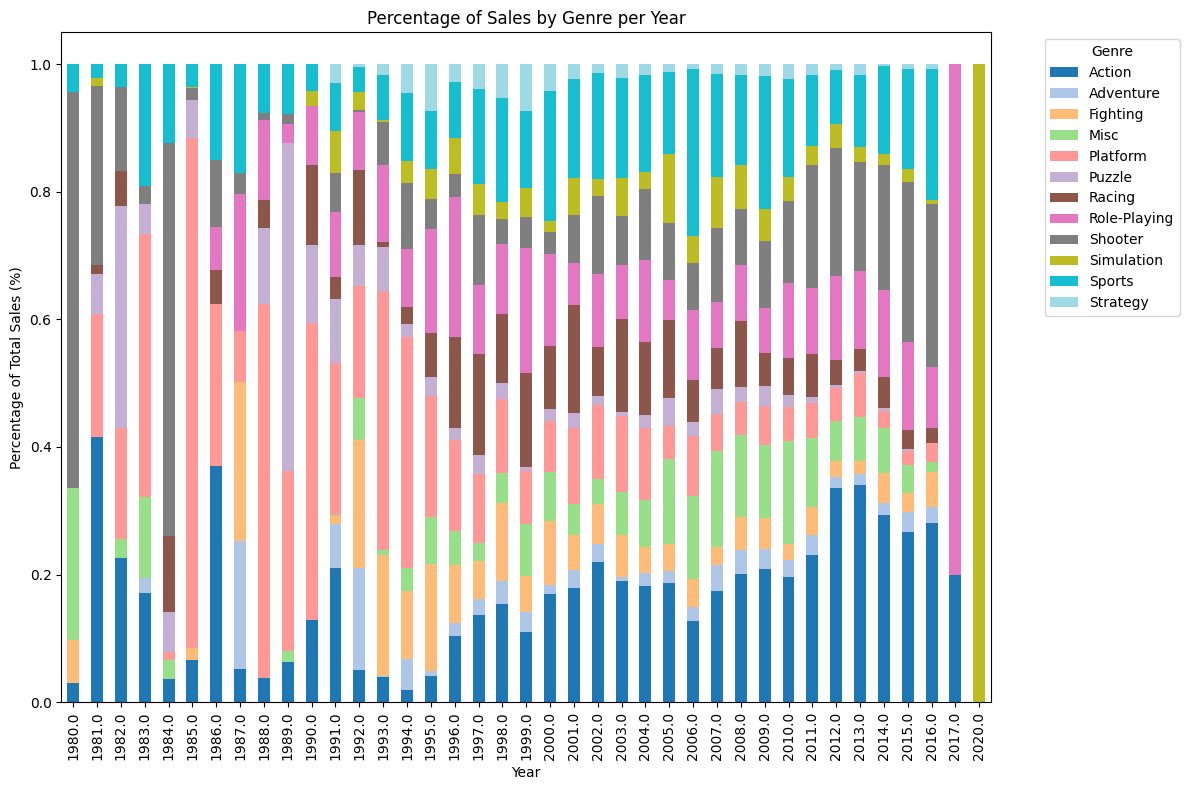

In [49]:
df_pivot = df_merged.pivot(index='Year', columns='Genre', values='percentage')

# Plot the stacked bar chart
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

# Customize the plot
plt.title('Percentage of Sales by Genre per Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Sales (%)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

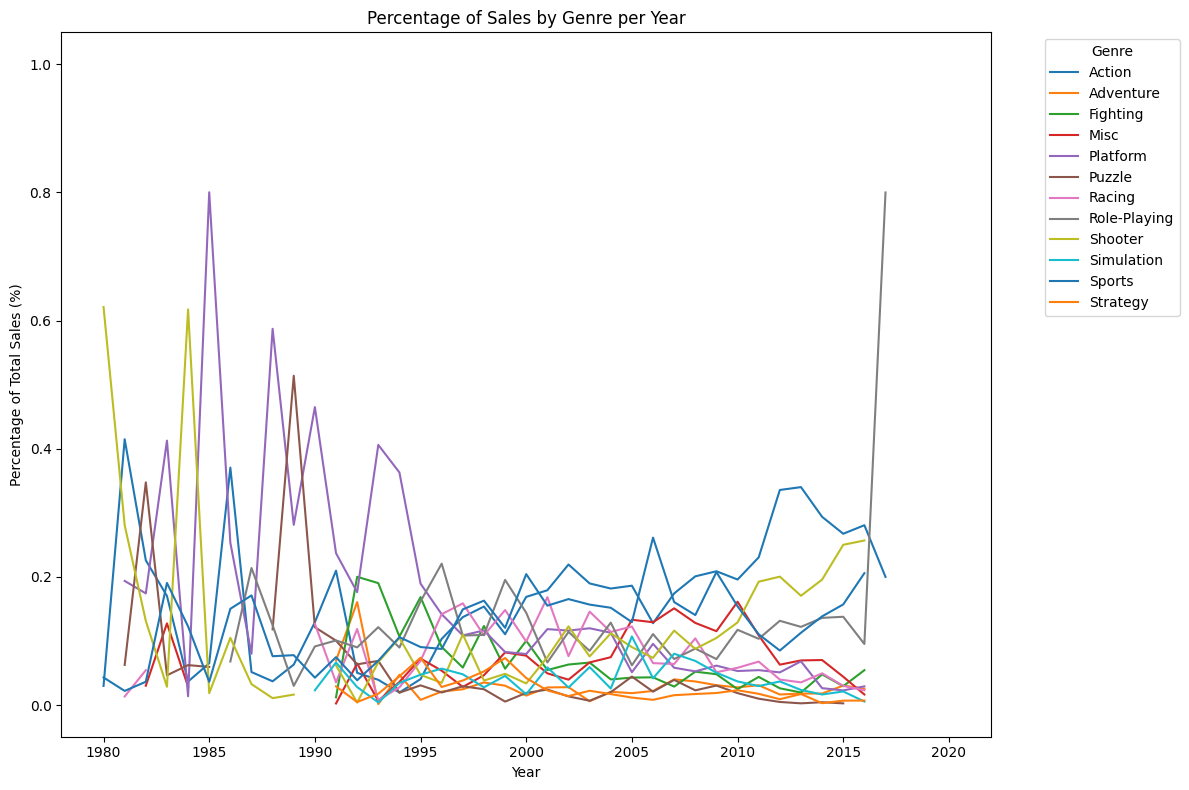

In [50]:
# Pivot the DataFrame so that each row is a Year and each column is a Genre's percentage
df_pivot = df_merged.pivot(index='Year', columns='Genre', values='percentage')

# Plot a line graph for each genre over the years
ax = df_pivot.plot(kind='line', figsize=(12, 8))

# Customize the plot
plt.title('Percentage of Sales by Genre per Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Sales (%)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [51]:
Percentage_per_year.index

Index([1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0,
       1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0,
       1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0,
       2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0,
       2016.0, 2017.0, 2020.0],
      dtype='float64', name='Year')

In [52]:
Genre_by_Year2.index

Index([1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0,
       1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0,
       1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0,
       2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0,
       2016.0, 2017.0, 2020.0],
      dtype='float64', name='Year')

In [53]:
#This is the dataframes for percentages: df_pivot is the percentage sales, and the Percentage_per_year is the total games of that genre

In [54]:
df_pivot

Genre     Action  Adventure  Fighting      Misc  Platform    Puzzle    Racing  \
Year                                                                            
1980.0  0.029877        NaN  0.067663  0.238137       NaN       NaN       NaN   
1981.0  0.414873        NaN       NaN       NaN  0.193738  0.062622  0.013419   
1982.0  0.225918        NaN       NaN  0.030146  0.174290  0.347540  0.054401   
1983.0  0.170339   0.023824       NaN  0.127457  0.412746  0.046456       NaN   
1984.0  0.036736        NaN       NaN  0.028793  0.013701  0.062351  0.118149   
1985.0  0.065258        NaN  0.019466       NaN  0.800334  0.059511       NaN   
1986.0  0.370650        NaN       NaN       NaN  0.253305       NaN  0.052873   
1987.0  0.051518   0.201472  0.249310       NaN  0.080037       NaN       NaN   
1988.0  0.037061        NaN       NaN       NaN  0.587251  0.118170  0.045320   
1989.0  0.063172        NaN       NaN  0.017427  0.281280  0.513955       NaN   
1990.0  0.129378        NaN       NaN       NaN  0.465074  0.121482  0.126746   
1991.0  0.209742   0.069500  0.012101  0.002482  0.237046  0.100527  0.035371   
1992.0  0.050289   0.160714  0.200236  0.064863  0.176208  0.063550  0.118697   
1993.0  0.039365   0.001522  0.190300  0.006525  0.406046  0.068943  0.007829   
1994.0  0.019578   0.047240  0.106985  0.036125  0.363016  0.019326  0.027662   
1995.0  0.040518   0.008172  0.168539  0.072636  0.189422  0.030757  0.069118   
1996.0  0.103339   0.021039  0.090685  0.053628  0.141752  0.019633  0.141803   
1997.0  0.137228   0.024679  0.058513  0.028311  0.108717  0.029306  0.158772   
1998.0  0.153780   0.035287  0.123445  0.046555  0.116505  0.024720  0.108785   
1999.0  0.110558   0.030246  0.056752  0.082183  0.082859  0.005413  0.148327   
2000.0  0.168883   0.014785  0.100318  0.077099  0.079679  0.018952  0.099176   
2001.0  0.179172   0.027514  0.054666  0.049477  0.118502  0.024135  0.168371   
2002.0  0.219382   0.027938  0.063258  0.039619  0.116227  0.013501  0.076355   
2003.0  0.189828   0.005980  0.066313  0.066564  0.119855  0.006763  0.145843   
2004.0  0.181870   0.020748  0.040018  0.074694  0.112900  0.020104  0.114140   
2005.0  0.186307   0.018546  0.042875  0.133148  0.051224  0.044462  0.122668   
2006.0  0.127783   0.022014  0.043279  0.129261  0.095578  0.020920  0.065427   
2007.0  0.174267   0.040041  0.028815  0.150983  0.058236  0.039272  0.064094   
2008.0  0.200899   0.036854  0.052114  0.128193  0.052585  0.022964  0.104080   
2009.0  0.208842   0.030991  0.048179  0.115300  0.061577  0.030436  0.051236   
2010.0  0.195920   0.027596  0.024798  0.161312  0.053127  0.018619  0.058173   
2011.0  0.230547   0.030970  0.043954  0.108684  0.054478  0.009903  0.067850   
2012.0  0.335699   0.016477  0.026159  0.063047  0.051026  0.004841  0.039776   
2013.0  0.340170   0.017957  0.019587  0.069680  0.068240  0.002689  0.035424   
2014.0  0.293784   0.017980  0.047916  0.070257  0.026376  0.004450  0.049518   
2015.0  0.267357   0.030366  0.029421  0.044207  0.022879  0.002647  0.029950   
2016.0  0.280699   0.025518  0.054420  0.016495  0.029184       NaN  0.023121   
2017.0  0.200000        NaN       NaN       NaN       NaN       NaN       NaN   
2020.0       NaN        NaN       NaN       NaN       NaN       NaN       NaN   

Genre   Role-Playing   Shooter  Simulation    Sports  Strategy  
Year                                                            
1980.0           NaN  0.621265         NaN  0.043058       NaN  
1981.0           NaN  0.280682    0.012580  0.022086       NaN  
1982.0           NaN  0.131324         NaN  0.036383       NaN  
1983.0           NaN  0.028588         NaN  0.190590       NaN  
1984.0           NaN  0.617554         NaN  0.122716       NaN  
1985.0           NaN  0.018539    0.000556  0.036337       NaN  
1986.0      0.067979  0.104937         NaN  0.150256       NaN  
1987.0      0.213891  0.032659         NaN  0.171113       NaN  
1988.0      0.124524  0.0108

In [55]:
df_diff = df_pivot - Percentage_per_year
df_diff

Genre     Action  Adventure  Fighting      Misc  Platform    Puzzle    Racing  \
Year                                                                            
1980.0 -0.081234        NaN -0.043449 -0.206307       NaN       NaN       NaN   
1981.0 -0.128605        NaN       NaN       NaN  0.128520  0.019144 -0.008320   
1982.0 -0.274082        NaN       NaN  0.002368  0.035401  0.264207 -0.001155   
1983.0 -0.241425  -0.035000       NaN  0.068633  0.118628 -0.012367       NaN   
1984.0 -0.034693        NaN       NaN -0.042636 -0.057727 -0.151935 -0.096136   
1985.0 -0.077599        NaN -0.051962       NaN  0.514619 -0.226204       NaN   
1986.0  0.084936        NaN       NaN       NaN -0.032410       NaN  0.005254   
1987.0 -0.073482   0.138972  0.124310       NaN -0.044963       NaN       NaN   
1988.0 -0.096273        NaN       NaN       NaN  0.320584  0.051504 -0.021347   
1989.0 -0.054475        NaN       NaN -0.041397  0.104809  0.219837       NaN   
1990.0 -0.058122        NaN       NaN       NaN  0.277574 -0.003518  0.001746   
1991.0  0.087791   0.020720 -0.012290 -0.021908  0.090705  0.002966  0.010981   
1992.0  0.027033   0.067691  0.037446  0.018352  0.036673 -0.052729  0.072186   
1993.0 -0.060635  -0.015144  0.006967 -0.043475  0.222713  0.018943 -0.025504   
1994.0 -0.013480   0.014182 -0.074833 -0.013462  0.272107 -0.005468 -0.038454   
1995.0  0.003988  -0.051189  0.036119 -0.027820  0.130062 -0.024038  0.014324   
1996.0  0.027294  -0.043599 -0.023383 -0.033825  0.088521 -0.014587  0.058152   
1997.0  0.029961  -0.023764 -0.038373 -0.013211  0.046434 -0.019137  0.034205   
1998.0  0.037685  -0.025399  0.015266 -0.011492  0.050542 -0.009581 -0.020503   
1999.0 -0.007785  -0.025967 -0.014254  0.008218  0.029605 -0.012339  0.003356   
2000.0  0.042808  -0.031061  0.017223  0.019792  0.010911 -0.015432 -0.024033   
2001.0  0.040167  -0.016055  0.017321 -0.004465  0.029291 -0.006985  0.021068   
2002.0  0.068598  -0.022726 -0.001880 -0.014664  0.023344 -0.010624 -0.047891   
2003.0  0.004022  -0.009504  0.009539 -0.001823  0.007597 -0.003560  0.005198   
2004.0  0.018043  -0.030366 -0.011096 -0.036708  0.026399 -0.012661  0.021086   
2005.0 -0.017731  -0.026087 -0.002821  0.010937 -0.036980  0.009393  0.040840   
2006.0 -0.054757  -0.048423 -0.011285  0.021126  0.042007 -0.021739 -0.008978   
2007.0 -0.001273  -0.029843 -0.012782  0.025359  0.023295 -0.015637 -0.007453   
2008.0  0.046137  -0.079393  0.012198 -0.020267  0.009168 -0.021854  0.046657   
2009.0  0.018765  -0.067542  0.011142 -0.029354  0.041311 -0.024770 -0.007464   
2010.0  0.016412  -0.094723 -0.006973  0.001662  0.028504 -0.017123  0.012899   
2011.0  0.020714  -0.063850  0.000056 -0.052861  0.021993 -0.027849  0.010783   
2012.0 -0.069172  -0.071803 -0.017981  0.005208  0.032761 -0.011901 -0.005887   
2013.0  0.069108  -0.091934 -0.017043 -0.007243  0.000475 -0.002805  0.006120   
2014.0 -0.025803  -0.110886  0.008397 -0.000190  0.009194 -0.009295  0.003126   
2015.0 -0.147952  -0.057582 -0.004781 -0.019311  0.000077 -0.007125 -0.000995   
2016.0 -0.065231  -0.073319  0.013722 -0.035830  0.000114       NaN -0.035018   
2017.0 -0.133333        NaN       NaN       NaN       NaN       NaN       NaN   
2020.0       NaN        NaN       NaN       NaN       NaN       NaN       NaN   

Genre   Role-Playing   Shooter  Simulation    Sports  Strategy  
Year                                                            
1980.0           NaN  0.399043         NaN -0.068053       NaN  
1981.0           NaN  0.063291   -0.009159 -0.064871       NaN  
1982.0           NaN -0.007565         NaN -0.019173       NaN  
1983.0           NaN -0.030235         NaN  0.131766       NaN  
1984.0           NaN  0.403268         NaN -0.020141       NaN  
1985.0           NaN -0.052889   -0.070872 -0.035092       NaN  
1986.0      0.020360 -0.085540         NaN  0.007399       NaN  
1987.0      0.026391 -0.092341         NaN -0.078887       NaN  
1988.0     -0.075476 -0.0558

In [56]:
#print(Percentage_per_year.index)
print(Percentage_per_year.columns)
#print(Percentage_per_year.dtypes)

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')


In [57]:
df_compare = pd.merge(df_pivot, Percentage_per_year, on=['Year'], suffixes=('_salesP', '_pubP'))
df_compare

Genre   Action_salesP  Adventure_salesP  Fighting_salesP  Misc_salesP  \
Year                                                                    
1980.0       0.029877               NaN         0.067663     0.238137   
1981.0       0.414873               NaN              NaN          NaN   
1982.0       0.225918               NaN              NaN     0.030146   
1983.0       0.170339          0.023824              NaN     0.127457   
1984.0       0.036736               NaN              NaN     0.028793   
1985.0       0.065258               NaN         0.019466          NaN   
1986.0       0.370650               NaN              NaN          NaN   
1987.0       0.051518          0.201472         0.249310          NaN   
1988.0       0.037061               NaN              NaN          NaN   
1989.0       0.063172               NaN              NaN     0.017427   
1990.0       0.129378               NaN              NaN          NaN   
1991.0       0.209742          0.069500         0.012101     0.002482   
1992.0       0.050289          0.160714         0.200236     0.064863   
1993.0       0.039365          0.001522         0.190300     0.006525   
1994.0       0.019578          0.047240         0.106985     0.036125   
1995.0       0.040518          0.008172         0.168539     0.072636   
1996.0       0.103339          0.021039         0.090685     0.053628   
1997.0       0.137228          0.024679         0.058513     0.028311   
1998.0       0.153780          0.035287         0.123445     0.046555   
1999.0       0.110558          0.030246         0.056752     0.082183   
2000.0       0.168883          0.014785         0.100318     0.077099   
2001.0       0.179172          0.027514         0.054666     0.049477   
2002.0       0.219382          0.027938         0.063258     0.039619   
2003.0       0.189828          0.005980         0.066313     0.066564   
2004.0       0.181870          0.020748         0.040018     0.074694   
2005.0       0.186307          0.018546         0.042875     0.133148   
2006.0       0.127783          0.022014         0.043279     0.129261   
2007.0       0.174267          0.040041         0.028815     0.150983   
2008.0       0.200899          0.036854         0.052114     0.128193   
2009.0       0.208842          0.030991         0.048179     0.115300   
2010.0       0.195920          0.027596         0.024798     0.161312   
2011.0       0.230547          0.030970         0.043954     0.108684   
2012.0       0.335699          0.016477         0.026159     0.063047   
2013.0       0.340170          0.017957         0.019587     0.069680   
2014.0       0.293784          0.017980         0.047916     0.070257   
2015.0       0.267357          0.030366         0.029421     0.044207   
2016.0       0.280699          0.025518         0.054420     0.016495   
2017.0       0.200000               NaN              NaN          NaN   
2020.0            NaN               NaN              NaN          NaN   

Genre   Platform_salesP  Puzzle_salesP  Racing_salesP  Role-Playing_salesP  \
Year                                                                         
1980.0              NaN            NaN            NaN                  NaN   
1981.0         0.193738       0.062622       0.013419                  NaN   
1982.0         0.174290       0.347540       0.054401                  NaN   
1983.0         0.412746       0.046456            NaN                  NaN   
1984.0         0.013701       0.062351       0.118149                  NaN   
1985.0         0.800334       0.059511            NaN                  NaN   
1986.0         0.253305            NaN       0.052873             0.067979   
1987.0         0.080037            NaN            NaN             0.213891   
1988.0         0.587251       0.118170       0.045320             0.124524   
1989.0         0.281280       0.513955            NaN             0.029952   
1990.0         0.465074       0.121482       0.126746             0.09

In [58]:
df_diff_reset = df_diff.reset_index()
genre_counts_reset = Genre_by_Year2.reset_index()

In [219]:
df_diff

Genre     Action  Adventure  Fighting      Misc  Platform    Puzzle    Racing  \
Year                                                                            
1980.0 -0.081234        NaN -0.043449 -0.206307       NaN       NaN       NaN   
1981.0 -0.128605        NaN       NaN       NaN  0.128520  0.019144 -0.008320   
1982.0 -0.274082        NaN       NaN  0.002368  0.035401  0.264207 -0.001155   
1983.0 -0.241425  -0.035000       NaN  0.068633  0.118628 -0.012367       NaN   
1984.0 -0.034693        NaN       NaN -0.042636 -0.057727 -0.151935 -0.096136   
1985.0 -0.077599        NaN -0.051962       NaN  0.514619 -0.226204       NaN   
1986.0  0.084936        NaN       NaN       NaN -0.032410       NaN  0.005254   
1987.0 -0.073482   0.138972  0.124310       NaN -0.044963       NaN       NaN   
1988.0 -0.096273        NaN       NaN       NaN  0.320584  0.051504 -0.021347   
1989.0 -0.054475        NaN       NaN -0.041397  0.104809  0.219837       NaN   
1990.0 -0.058122        NaN       NaN       NaN  0.277574 -0.003518  0.001746   
1991.0  0.087791   0.020720 -0.012290 -0.021908  0.090705  0.002966  0.010981   
1992.0  0.027033   0.067691  0.037446  0.018352  0.036673 -0.052729  0.072186   
1993.0 -0.060635  -0.015144  0.006967 -0.043475  0.222713  0.018943 -0.025504   
1994.0 -0.013480   0.014182 -0.074833 -0.013462  0.272107 -0.005468 -0.038454   
1995.0  0.003988  -0.051189  0.036119 -0.027820  0.130062 -0.024038  0.014324   
1996.0  0.027294  -0.043599 -0.023383 -0.033825  0.088521 -0.014587  0.058152   
1997.0  0.029961  -0.023764 -0.038373 -0.013211  0.046434 -0.019137  0.034205   
1998.0  0.037685  -0.025399  0.015266 -0.011492  0.050542 -0.009581 -0.020503   
1999.0 -0.007785  -0.025967 -0.014254  0.008218  0.029605 -0.012339  0.003356   
2000.0  0.042808  -0.031061  0.017223  0.019792  0.010911 -0.015432 -0.024033   
2001.0  0.040167  -0.016055  0.017321 -0.004465  0.029291 -0.006985  0.021068   
2002.0  0.068598  -0.022726 -0.001880 -0.014664  0.023344 -0.010624 -0.047891   
2003.0  0.004022  -0.009504  0.009539 -0.001823  0.007597 -0.003560  0.005198   
2004.0  0.018043  -0.030366 -0.011096 -0.036708  0.026399 -0.012661  0.021086   
2005.0 -0.017731  -0.026087 -0.002821  0.010937 -0.036980  0.009393  0.040840   
2006.0 -0.054757  -0.048423 -0.011285  0.021126  0.042007 -0.021739 -0.008978   
2007.0 -0.001273  -0.029843 -0.012782  0.025359  0.023295 -0.015637 -0.007453   
2008.0  0.046137  -0.079393  0.012198 -0.020267  0.009168 -0.021854  0.046657   
2009.0  0.018765  -0.067542  0.011142 -0.029354  0.041311 -0.024770 -0.007464   
2010.0  0.016412  -0.094723 -0.006973  0.001662  0.028504 -0.017123  0.012899   
2011.0  0.020714  -0.063850  0.000056 -0.052861  0.021993 -0.027849  0.010783   
2012.0 -0.069172  -0.071803 -0.017981  0.005208  0.032761 -0.011901 -0.005887   
2013.0  0.069108  -0.091934 -0.017043 -0.007243  0.000475 -0.002805  0.006120   
2014.0 -0.025803  -0.110886  0.008397 -0.000190  0.009194 -0.009295  0.003126   
2015.0 -0.147952  -0.057582 -0.004781 -0.019311  0.000077 -0.007125 -0.000995   
2016.0 -0.065231  -0.073319  0.013722 -0.035830  0.000114       NaN -0.035018   
2017.0 -0.133333        NaN       NaN       NaN       NaN       NaN       NaN   
2020.0       NaN        NaN       NaN       NaN       NaN       NaN       NaN   

Genre   Role-Playing   Shooter  Simulation    Sports  Strategy  
Year                                                            
1980.0           NaN  0.399043         NaN -0.068053       NaN  
1981.0           NaN  0.063291   -0.009159 -0.064871       NaN  
1982.0           NaN -0.007565         NaN -0.019173       NaN  
1983.0           NaN -0.030235         NaN  0.131766       NaN  
1984.0           NaN  0.403268         NaN -0.020141       NaN  
1985.0           NaN -0.052889   -0.070872 -0.035092       NaN  
1986.0      0.020360 -0.085540         NaN  0.007399       NaN  
1987.0      0.026391 -0.092341         NaN -0.078887       NaN  
1988.0     -0.075476 -0.0558

In [218]:
df_diff_long = df_diff_reset.melt(
    id_vars='Year',
    var_name='Genre',
    value_name='Difference'
)

genre_counts_long = genre_counts_reset.drop(columns='Total_Games').melt(
    id_vars='Year',
    var_name='Genre',
    value_name='Game_Count'
)

In [60]:
df_combined = pd.merge(df_diff_long, genre_counts_long, on=['Year', 'Genre'], how='inner')
df_combined

Year     Genre  Difference  Game_Count
0    1980.0    Action   -0.081234           1
1    1981.0    Action   -0.128605          25
2    1982.0    Action   -0.274082          18
3    1983.0    Action   -0.241425           7
4    1984.0    Action   -0.034693           1
..      ...       ...         ...         ...
463  2014.0  Strategy   -0.010808           8
464  2015.0  Strategy   -0.020805          17
465  2016.0  Strategy   -0.022021          10
466  2017.0  Strategy         NaN           0
467  2020.0  Strategy         NaN           0

[468 rows x 4 columns]

In [61]:
df_combined = df_combined[df_combined['Game_Count'] > 0]

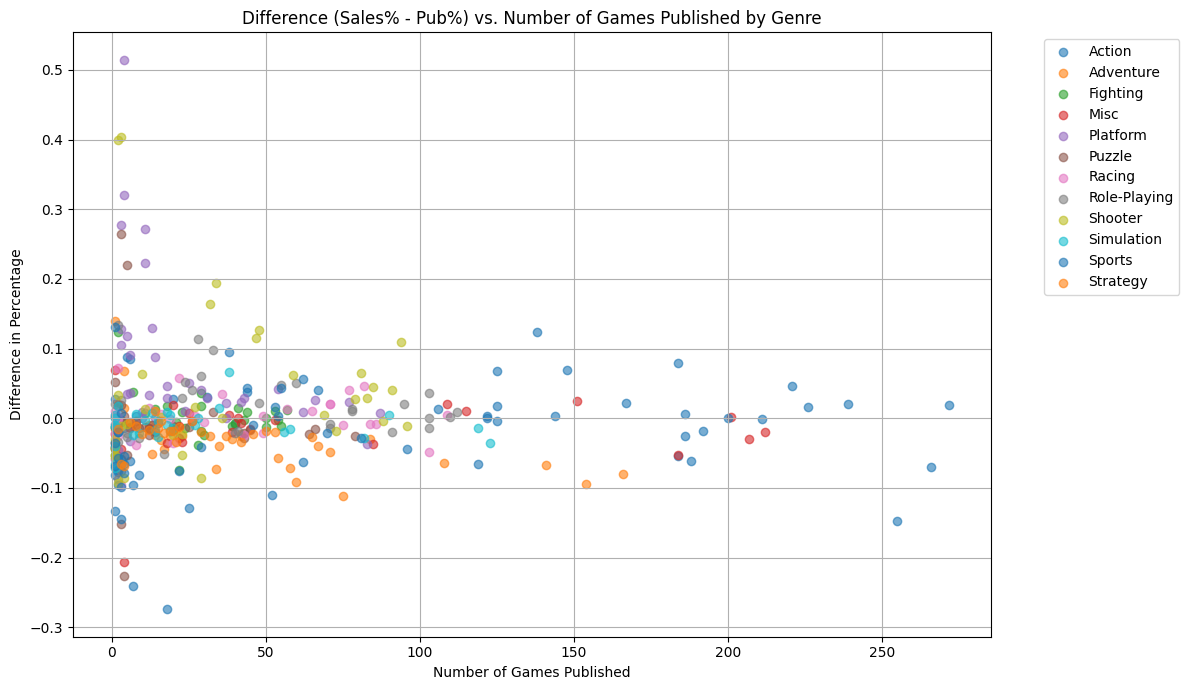

In [62]:
plt.figure(figsize=(12, 7))
genres = df_combined['Genre'].unique()

for genre in genres:
    data = df_combined[df_combined['Genre'] == genre]
    plt.scatter(data['Game_Count'], data['Difference'], alpha=0.6, label=genre)

plt.title('Difference (Sales% - Pub%) vs. Number of Games Published by Genre')
plt.xlabel('Number of Games Published')
plt.ylabel('Difference in Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

In [63]:
print(df_compare.columns)
df_compare.reset_index(inplace=True)

Index(['Action_salesP', 'Adventure_salesP', 'Fighting_salesP', 'Misc_salesP',
       'Platform_salesP', 'Puzzle_salesP', 'Racing_salesP',
       'Role-Playing_salesP', 'Shooter_salesP', 'Simulation_salesP',
       'Sports_salesP', 'Strategy_salesP', 'Action_pubP', 'Adventure_pubP',
       'Fighting_pubP', 'Misc_pubP', 'Platform_pubP', 'Puzzle_pubP',
       'Racing_pubP', 'Role-Playing_pubP', 'Shooter_pubP', 'Simulation_pubP',
       'Sports_pubP', 'Strategy_pubP'],
      dtype='object', name='Genre')


In [64]:
print(df_compare.columns)

Index(['Year', 'Action_salesP', 'Adventure_salesP', 'Fighting_salesP',
       'Misc_salesP', 'Platform_salesP', 'Puzzle_salesP', 'Racing_salesP',
       'Role-Playing_salesP', 'Shooter_salesP', 'Simulation_salesP',
       'Sports_salesP', 'Strategy_salesP', 'Action_pubP', 'Adventure_pubP',
       'Fighting_pubP', 'Misc_pubP', 'Platform_pubP', 'Puzzle_pubP',
       'Racing_pubP', 'Role-Playing_pubP', 'Shooter_pubP', 'Simulation_pubP',
       'Sports_pubP', 'Strategy_pubP'],
      dtype='object', name='Genre')


In [65]:
#Genre_diff = pd.DataFrame(df_compare[<genre>_salesP] - df_compare[<genre>_pubP])

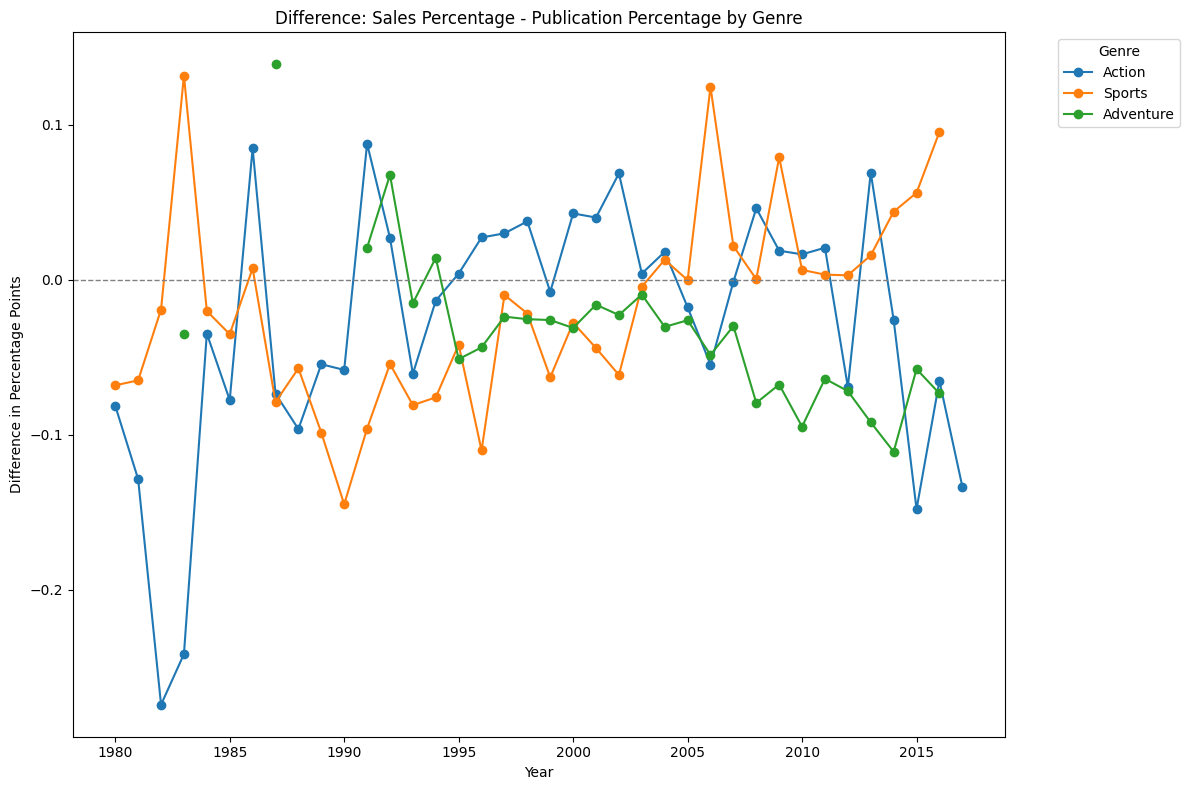

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Suppose df_merged contains the following columns:
# 'Year', 'Action_sales', 'Action_pub', 'Sports_sales', 'Sports_pub', etc.

# List the genres you want to compare (without suffixes)
genres = ['Action', 'Sports', 'Adventure']  # Extend this list as needed

# Compute the difference for each genre and create new columns
for genre in genres:
    sales_col = f"{genre}_salesP"
    pub_col = f"{genre}_pubP"
    diff_col = f"{genre}_diff"
    df_compare[diff_col] = df_compare[sales_col] - df_compare[pub_col]

# Now, plot the differences over time for each genre
fig, ax = plt.subplots(figsize=(12, 8))
for genre in genres:
    diff_col = f"{genre}_diff"
    ax.plot(df_compare['Year'], df_compare[diff_col], marker='o', label=genre)

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_title('Difference: Sales Percentage - Publication Percentage by Genre')
ax.set_xlabel('Year')
ax.set_ylabel('Difference in Percentage Points')
ax.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

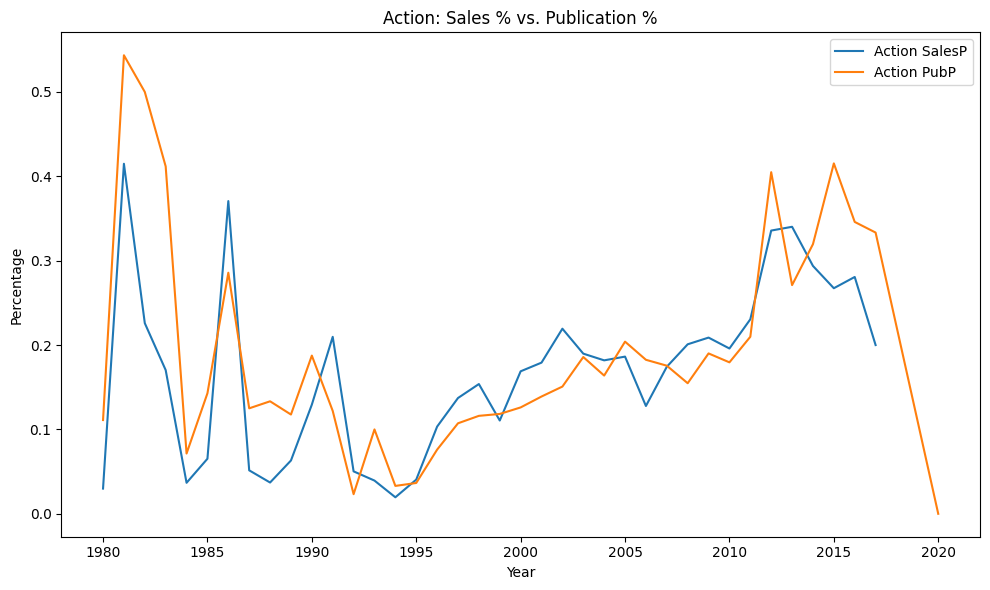

In [67]:
genre = 'Action'  # pick one genre for demonstration
plt.figure(figsize=(10, 6))
plt.plot(df_compare['Year'], df_compare[f'{genre}_salesP'],label=f'{genre} SalesP')
plt.plot(df_compare['Year'], df_compare[f'{genre}_pubP'], label=f'{genre} PubP')
plt.title(f'{genre}: Sales % vs. Publication %')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.tight_layout()
plt.show()

# Total sales by genre is KEY!

# Histogram
# KDE PLot
# BoxPlot

In [68]:
df_2["Release Date"] = df_2["Release Date"].str.split("•",expand=True)[0].str.strip()
df_2["Release Date"]

0         DEC 8, 2023
1        NOV 23, 1998
2        SEP 20, 2000
3        APR 29, 2008
4         SEP 8, 1999
             ...     
14821     APR 5, 2013
14822     APR 5, 2017
14823    OCT 10, 2007
14824     DEC 4, 2012
14825    OCT 28, 2010
Name: Release Date, Length: 14826, dtype: object

In [69]:
df_2[['Month_Day', 'Year']] = df_2["Release Date"].str.split(",", expand=True)
df_2

Unnamed: 0                                              Title  \
0               0                                 1. Baldur's Gate 3   
1               1            2. The Legend of Zelda: Ocarina of Time   
2               2                        3. Tony Hawk's Pro Skater 2   
3               3                             4. Grand Theft Auto IV   
4               4                                     5. SoulCalibur   
...           ...                                                ...   
14821       14821    14,777. Double Dragon II: Wander of the Dragons   
14822       14822                     14,778. Vroom in the Night Sky   
14823       14823                                      14,779. Yaris   
14824       14824  14,780. Family Party: 30 Great Games Obstacle ...   
14825       14825  14,781. Beast Boxing 3D - Monster Fighting Act...   

       Release Date Score Month_Day   Year  
0       DEC 8, 2023    99     DEC 8   2023  
1      NOV 23, 1998    99    NOV 23   1998  
2      SEP 20, 2000    98    SEP 20   2000  
3      APR 29, 2008    98    APR 29   2008  
4       SEP 8, 1999    98     SEP 8   1999  
...             ...   ...       ...    ...  
14821   APR 5, 2013    17     APR 5   2013  
14822   APR 5, 2017    17     APR 5   2017  
14823  OCT 10, 2007    11    OCT 10   2007  
14824   DEC 4, 2012    66     DEC 4   2012  
14825  OCT 28, 2010    80    OCT 28   2010  

[14826 rows x 6 columns]

In [70]:
df_2

Unnamed: 0                                              Title  \
0               0                                 1. Baldur's Gate 3   
1               1            2. The Legend of Zelda: Ocarina of Time   
2               2                        3. Tony Hawk's Pro Skater 2   
3               3                             4. Grand Theft Auto IV   
4               4                                     5. SoulCalibur   
...           ...                                                ...   
14821       14821    14,777. Double Dragon II: Wander of the Dragons   
14822       14822                     14,778. Vroom in the Night Sky   
14823       14823                                      14,779. Yaris   
14824       14824  14,780. Family Party: 30 Great Games Obstacle ...   
14825       14825  14,781. Beast Boxing 3D - Monster Fighting Act...   

       Release Date Score Month_Day   Year  
0       DEC 8, 2023    99     DEC 8   2023  
1      NOV 23, 1998    99    NOV 23   1998  
2      SEP 20, 2000    98    SEP 20   2000  
3      APR 29, 2008    98    APR 29   2008  
4       SEP 8, 1999    98     SEP 8   1999  
...             ...   ...       ...    ...  
14821   APR 5, 2013    17     APR 5   2013  
14822   APR 5, 2017    17     APR 5   2017  
14823  OCT 10, 2007    11    OCT 10   2007  
14824   DEC 4, 2012    66     DEC 4   2012  
14825  OCT 28, 2010    80    OCT 28   2010  

[14826 rows x 6 columns]

In [71]:
df_2.drop(columns=["Unnamed: 0"], inplace=True)
df_2

Title  Release Date Score  \
0                                     1. Baldur's Gate 3   DEC 8, 2023    99   
1                2. The Legend of Zelda: Ocarina of Time  NOV 23, 1998    99   
2                            3. Tony Hawk's Pro Skater 2  SEP 20, 2000    98   
3                                 4. Grand Theft Auto IV  APR 29, 2008    98   
4                                         5. SoulCalibur   SEP 8, 1999    98   
...                                                  ...           ...   ...   
14821    14,777. Double Dragon II: Wander of the Dragons   APR 5, 2013    17   
14822                     14,778. Vroom in the Night Sky   APR 5, 2017    17   
14823                                      14,779. Yaris  OCT 10, 2007    11   
14824  14,780. Family Party: 30 Great Games Obstacle ...   DEC 4, 2012    66   
14825  14,781. Beast Boxing 3D - Monster Fighting Act...  OCT 28, 2010    80   

      Month_Day   Year  
0         DEC 8   2023  
1        NOV 23   1998  
2        SEP 20   2000  
3        APR 29   2008  
4         SEP 8   1999  
...         ...    ...  
14821     APR 5   2013  
14822     APR 5   2017  
14823    OCT 10   2007  
14824     DEC 4   2012  
14825    OCT 28   2010  

[14826 rows x 5 columns]

In [72]:
df_2

Title  Release Date Score  \
0                                     1. Baldur's Gate 3   DEC 8, 2023    99   
1                2. The Legend of Zelda: Ocarina of Time  NOV 23, 1998    99   
2                            3. Tony Hawk's Pro Skater 2  SEP 20, 2000    98   
3                                 4. Grand Theft Auto IV  APR 29, 2008    98   
4                                         5. SoulCalibur   SEP 8, 1999    98   
...                                                  ...           ...   ...   
14821    14,777. Double Dragon II: Wander of the Dragons   APR 5, 2013    17   
14822                     14,778. Vroom in the Night Sky   APR 5, 2017    17   
14823                                      14,779. Yaris  OCT 10, 2007    11   
14824  14,780. Family Party: 30 Great Games Obstacle ...   DEC 4, 2012    66   
14825  14,781. Beast Boxing 3D - Monster Fighting Act...  OCT 28, 2010    80   

      Month_Day   Year  
0         DEC 8   2023  
1        NOV 23   1998  
2        SEP 20   2000  
3        APR 29   2008  
4         SEP 8   1999  
...         ...    ...  
14821     APR 5   2013  
14822     APR 5   2017  
14823    OCT 10   2007  
14824     DEC 4   2012  
14825    OCT 28   2010  

[14826 rows x 5 columns]

In [220]:
df_2[['Rank', 'Game']] = df_2["Title"].str.split(".",n=1,expand=True)
df_2

Title  Release Date Score  \
0                                     1. Baldur's Gate 3   DEC 8, 2023    99   
1                2. The Legend of Zelda: Ocarina of Time  NOV 23, 1998    99   
2                            3. Tony Hawk's Pro Skater 2  SEP 20, 2000    98   
3                                 4. Grand Theft Auto IV  APR 29, 2008    98   
4                                         5. SoulCalibur   SEP 8, 1999    98   
...                                                  ...           ...   ...   
14821    14,777. Double Dragon II: Wander of the Dragons   APR 5, 2013    17   
14822                     14,778. Vroom in the Night Sky   APR 5, 2017    17   
14823                                      14,779. Yaris  OCT 10, 2007    11   
14824  14,780. Family Party: 30 Great Games Obstacle ...   DEC 4, 2012    66   
14825  14,781. Beast Boxing 3D - Monster Fighting Act...  OCT 28, 2010    80   

      Month_Day   Year    Rank                                           Game  
0         DEC 8   2023       1                                Baldur's Gate 3  
1        NOV 23   1998       2           The Legend of Zelda: Ocarina of Time  
2        SEP 20   2000       3                       Tony Hawk's Pro Skater 2  
3        APR 29   2008       4                            Grand Theft Auto IV  
4         SEP 8   1999       5                                    SoulCalibur  
...         ...    ...     ...                                            ...  
14821     APR 5   2013  14,777        Double Dragon II: Wander of the Dragons  
14822     APR 5   2017  14,778                         Vroom in the Night Sky  
14823    OCT 10   2007  14,779                                          Yaris  
14824     DEC 4   2012  14,780   Family Party: 30 Great Games Obstacle Arcade  
14825    OCT 28   2010  14,781     Beast Boxing 3D - Monster Fighting Action!  

[14826 rows x 7 columns]

In [74]:
df_2_fusion = df_2[["Score", "Month_Day","Year","Rank", "Game" ]]


In [75]:
df_2_fusion.dtypes

Score        object
Month_Day    object
Year         object
Rank         object
Game         object
dtype: object

In [76]:
df_2_fusion[df_2_fusion["Game"] =="Wii Sports"]

Empty DataFrame
Columns: [Score, Month_Day, Year, Rank, Game]
Index: []

In [77]:
df_2_fusion.loc[0, "Game"]

" Baldur's Gate 3"

In [78]:
df_1.loc[0,"Name"]

'Wii Sports'

In [79]:
df_2_fusion["Game"] = df_2_fusion["Game"].str.strip()

C:\Users\artur\AppData\Local\Temp\ipykernel_30276\3564029507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_fusion["Game"] = df_2_fusion["Game"].str.strip()


In [80]:
df_2_fusion[df_2_fusion['Game'].str.contains('wii sports', case=False, na=False)]

Score Month_Day   Year   Rank               Game
3743    80    JUL 26   2009  3,720  Wii Sports Resort
6289    76    NOV 19   2006  6,266         Wii Sports
9997    68     NOV 7   2013  9,974    Wii Sports Club

In [81]:
print(f"Lets see if there is a space_{df_2_fusion.loc[6289, 'Game']}_")

Lets see if there is a space_Wii Sports_


In [82]:
df_2.describe()

Title  Release Date  Score Month_Day   Year  \
count                          14826         14826  14826     14826  14826   
unique                         14781          4997     85       365     31   
top     13. Tony Hawk's Pro Skater 3  NOV 14, 2006     80    NOV 17   2011   
freq                               2            27    551       119    803   

         Rank   Game  
count   14826  14826  
unique  14781  13860  
top        13         
freq        2    684

In [83]:
df_2[~df_2["Title"].str.contains(".")]

Empty DataFrame
Columns: [Title, Release Date, Score, Month_Day, Year, Rank, Game]
Index: []

In [84]:
df_2[~df_2["Title"].str.count(".")>1]

Empty DataFrame
Columns: [Title, Release Date, Score, Month_Day, Year, Rank, Game]
Index: []

In [85]:
bad_rows = df_2_fusion[df_2_fusion['Score'].str.isnumeric()]
bad_rows

Score Month_Day   Year    Rank  \
0        99     DEC 8   2023       1   
1        99    NOV 23   1998       2   
2        98    SEP 20   2000       3   
3        98    APR 29   2008       4   
4        98     SEP 8   1999       5   
...     ...       ...    ...     ...   
14821    17     APR 5   2013  14,777   
14822    17     APR 5   2017  14,778   
14823    11    OCT 10   2007  14,779   
14824    66     DEC 4   2012  14,780   
14825    80    OCT 28   2010  14,781   

                                               Game  
0                                   Baldur's Gate 3  
1              The Legend of Zelda: Ocarina of Time  
2                          Tony Hawk's Pro Skater 2  
3                               Grand Theft Auto IV  
4                                       SoulCalibur  
...                                             ...  
14821       Double Dragon II: Wander of the Dragons  
14822                        Vroom in the Night Sky  
14823                                         Yaris  
14824  Family Party: 30 Great Games Obstacle Arcade  
14825    Beast Boxing 3D - Monster Fighting Action!  

[14777 rows x 5 columns]

In [86]:
temp_col = pd.to_numeric(df_2_fusion['Score'], errors='coerce')
bad_rows = df_2_fusion[temp_col.isna()]
bad_rows
#
temp_col.iloc[5345]

np.float64(nan)

In [87]:
df_2_fusion.dtypes

Score        object
Month_Day    object
Year         object
Rank         object
Game         object
dtype: object

In [88]:
df_2_fusion['Score'] = pd.to_numeric(df_2_fusion.loc[:,'Score'], errors='coerce')
df_2_fusion['Rank'] = pd.to_numeric(df_2_fusion.loc[:,'Rank'], errors='coerce')
df_2_fusion['Year'] = pd.to_numeric(df_2_fusion.loc[:,'Year'], errors='coerce')

C:\Users\artur\AppData\Local\Temp\ipykernel_30276\3424720843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_fusion['Score'] = pd.to_numeric(df_2_fusion.loc[:,'Score'], errors='coerce')
C:\Users\artur\AppData\Local\Temp\ipykernel_30276\3424720843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_fusion['Rank'] = pd.to_numeric(df_2_fusion.loc[:,'Rank'], errors='coerce')
C:\Users\artur\AppData\Local\Temp\ipykernel_30276\3424720843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a

In [194]:
import seaborn as sns

In [ ]:
df_2_fusion.copy()

Score Month_Day  Year  Rank  \
0       99.0     DEC 8  2023   1.0   
1       99.0    NOV 23  1998   2.0   
2       98.0    SEP 20  2000   3.0   
3       98.0    APR 29  2008   4.0   
4       98.0     SEP 8  1999   5.0   
...      ...       ...   ...   ...   
14821   17.0     APR 5  2013   NaN   
14822   17.0     APR 5  2017   NaN   
14823   11.0    OCT 10  2007   NaN   
14824   66.0     DEC 4  2012   NaN   
14825   80.0    OCT 28  2010   NaN   

                                               Game  
0                                   Baldur's Gate 3  
1              The Legend of Zelda: Ocarina of Time  
2                          Tony Hawk's Pro Skater 2  
3                               Grand Theft Auto IV  
4                                       SoulCalibur  
...                                             ...  
14821       Double Dragon II: Wander of the Dragons  
14822                        Vroom in the Night Sky  
14823                                         Yaris  
14824  Family Party: 30 Great Games Obstacle Arcade  
14825    Beast Boxing 3D - Monster Fighting Action!  

[14826 rows x 5 columns]

In [90]:
df_2_fusion_Score = df_2_fusion["Score"]

In [91]:
df_2_fusion['Score'] = df_2_fusion['Score'].replace({'Metascore': None})

C:\Users\artur\AppData\Local\Temp\ipykernel_30276\1474244358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_fusion['Score'] = df_2_fusion['Score'].replace({'Metascore': None})


<Axes: ylabel='Median_Sales'>

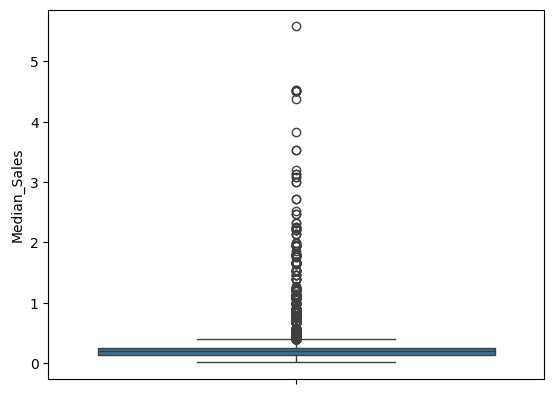

In [195]:
sns.boxplot(df_games["Median_Sales"])

In [92]:
df_joined = pd.merge(df_1, df_2_fusion, how='left',left_on='Name', right_on='Game')
df_joined


Rank_x                                              Name Platform  \
0           1                                        Wii Sports      Wii   
1           2                                 Super Mario Bros.      NES   
2           3                                    Mario Kart Wii      Wii   
3           4                                 Wii Sports Resort      Wii   
4           5                          Pokemon Red/Pokemon Blue       GB   
...       ...                                               ...      ...   
16737   16596                Woody Woodpecker in Crazy Castle 5      GBA   
16738   16597                     Men in Black II: Alien Escape       GC   
16739   16598  SCORE International Baja 1000: The Official Game      PS2   
16740   16599                                        Know How 2       DS   
16741   16600                                  Spirits & Spells      GBA   

       Year_x         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16737  2002.0      Platform       Kemco      0.01      0.00      0.00   
16738  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16739  2008.0        Racing  Activision      0.00      0.00      0.00   
16740  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16741  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  Score Month_Day  Year_y  Rank_y  \
0             8.46         82.74   76.0    NOV 19  2006.0     NaN   
1             0.77         40.24   84.0     JUN 2  2004.0     NaN   
2             3.31         35.82   82.0    APR 27  2008.0     NaN   
3             2.96         33.00   80.0    JUL 26  2009.0     NaN   
4             1.00         31.37    NaN       NaN     NaN     NaN   
...            ...           ...    ...       ...     ...     ...   
16737         0.00          0.01    NaN       NaN     NaN     NaN   
16738         0.00          0.01   50.0    JUN 28  2002.0     NaN   
16739         0.00          0.01    NaN       NaN     NaN     NaN   
16740         0.00          0.01    NaN       NaN     NaN     NaN   
16741         0.00          0.01   50.0    SEP 24  2003.0     NaN   

                                Game  
0                         Wii Sports  
1                  Super Mario Bros.  
2                     Mario Kart Wii  
3                  Wii Sports Resort  
4                                NaN  
...                              ...  
16737                            NaN  
16738  Men in Black II: Alien Escape  
16739                            NaN  
16740                            NaN  
16741               Spirits & Spells  

[16742 rows x 16 columns]

In [93]:
df_joined["Score"].isna().sum()

np.int64(9284)

In [94]:
df_joined.dtypes

Rank_x            int64
Name             object
Platform         object
Year_x          float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
Score           float64
Month_Day        object
Year_y          float64
Rank_y          float64
Game             object
dtype: object

In [95]:
df_joined["Month_Day"].isna().sum()

np.int64(9274)

In [96]:
df_joined["Year_x"] = df_joined["Year_x"].fillna(df_joined["Year_y"])

In [97]:
df_joined["Year_x"] = df_joined["Year_x"].astype("Int64") 

In [98]:
df_joined_datetest = df_joined['date'] = pd.to_datetime(df_joined['Month_Day'] + ' ' + df_joined['Year_x'].astype(str), format='%b %d %Y',errors="coerce")

df_joined_datetest.isnull().sum()

np.int64(9275)

In [99]:
print(f'__{df_joined.loc[0, "Month_Day"]}_')

__NOV 19_


In [100]:
df_joined

Rank_x                                              Name Platform  \
0           1                                        Wii Sports      Wii   
1           2                                 Super Mario Bros.      NES   
2           3                                    Mario Kart Wii      Wii   
3           4                                 Wii Sports Resort      Wii   
4           5                          Pokemon Red/Pokemon Blue       GB   
...       ...                                               ...      ...   
16737   16596                Woody Woodpecker in Crazy Castle 5      GBA   
16738   16597                     Men in Black II: Alien Escape       GC   
16739   16598  SCORE International Baja 1000: The Official Game      PS2   
16740   16599                                        Know How 2       DS   
16741   16600                                  Spirits & Spells      GBA   

       Year_x         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0        2006        Sports    Nintendo     41.49     29.02      3.77   
1        1985      Platform    Nintendo     29.08      3.58      6.81   
2        2008        Racing    Nintendo     15.85     12.88      3.79   
3        2009        Sports    Nintendo     15.75     11.01      3.28   
4        1996  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16737    2002      Platform       Kemco      0.01      0.00      0.00   
16738    2003       Shooter  Infogrames      0.01      0.00      0.00   
16739    2008        Racing  Activision      0.00      0.00      0.00   
16740    2010        Puzzle    7G//AMES      0.00      0.01      0.00   
16741    2003      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  Score Month_Day  Year_y  Rank_y  \
0             8.46         82.74   76.0    NOV 19  2006.0     NaN   
1             0.77         40.24   84.0     JUN 2  2004.0     NaN   
2             3.31         35.82   82.0    APR 27  2008.0     NaN   
3             2.96         33.00   80.0    JUL 26  2009.0     NaN   
4             1.00         31.37    NaN       NaN     NaN     NaN   
...            ...           ...    ...       ...     ...     ...   
16737         0.00          0.01    NaN       NaN     NaN     NaN   
16738         0.00          0.01   50.0    JUN 28  2002.0     NaN   
16739         0.00          0.01    NaN       NaN     NaN     NaN   
16740         0.00          0.01    NaN       NaN     NaN     NaN   
16741         0.00          0.01   50.0    SEP 24  2003.0     NaN   

                                Game       date  
0                         Wii Sports 2006-11-19  
1                  Super Mario Bros. 1985-06-02  
2                     Mario Kart Wii 2008-04-27  
3                  Wii Sports Resort 2009-07-26  
4                                NaN        NaT  
...                              ...        ...  
16737                            NaN        NaT  
16738  Men in Black II: Alien Escape 2003-06-28  
16739                            NaN        NaT  
16740                            NaN        NaT  
16741               Spirits & Spells 2003-09-24  

[16742 rows x 17 columns]

In [101]:
genre = "Action"
df_genre = df_joined[df_joined['Genre'] == genre].copy()

In [102]:
df_genre['Release_Date'] = pd.to_datetime(df_genre['date'])


C:\Users\artur\AppData\Local\Temp\ipykernel_30276\712311535.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  releases_2m = df_genre.resample('2M').size()
C:\Users\artur\AppData\Local\Temp\ipykernel_30276\712311535.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_diff_2m = df_genre.resample('2M')['Global_Sales'].mean()


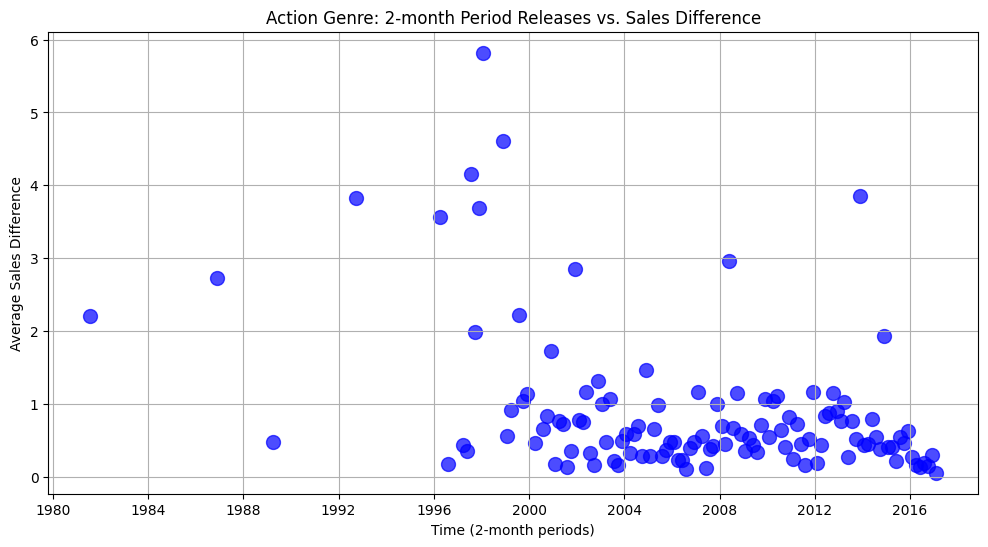

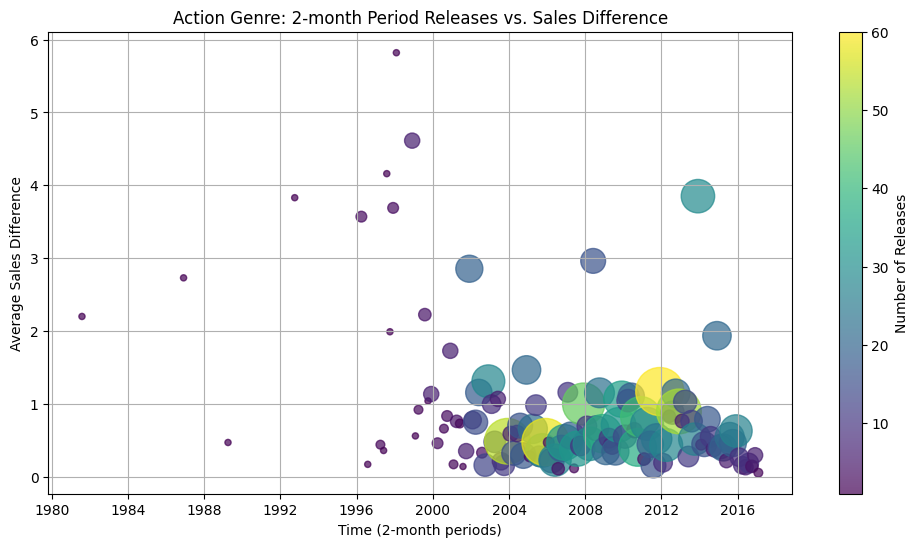

In [103]:
df_genre.sort_values('Release_Date', inplace=True)

# 4. Set the date as the index so you can resample
df_genre.set_index('Release_Date', inplace=True)

# 5. Resample the data into 2-month periods.
#    Here, we count how many releases happened in each 2-month period...
releases_2m = df_genre.resample('2M').size()
# ...and we also compute the average Sales_Difference in that period.
sales_diff_2m = df_genre.resample('2M')['Global_Sales'].mean()

# 6. Combine these into one DataFrame (if desired)
df_2m = pd.DataFrame({
    'Release_Count': releases_2m,
    'Avg_Sales_Diff': sales_diff_2m
})

# 7. Create a scatter plot.
#    One option is to simply plot Avg_Sales_Diff vs. the period.
plt.figure(figsize=(12, 6))
plt.scatter(df_2m.index, df_2m['Avg_Sales_Diff'], s=100, c='blue', alpha=0.7)
plt.xlabel('Time (2-month periods)')
plt.ylabel('Average Sales Difference')
plt.title(f'{genre} Genre: 2-month Period Releases vs. Sales Difference')
plt.grid(True)
plt.show()

# Optionally, if you want to see whether periods with more releases tend to have a lower (more negative) sales difference,
# you could encode the number of releases as the color or size of the markers:
plt.figure(figsize=(12, 6))
plt.scatter(df_2m.index, df_2m['Avg_Sales_Diff'], s=df_2m['Release_Count']*20, 
            c=df_2m['Release_Count'], cmap='viridis', alpha=0.7)
plt.xlabel('Time (2-month periods)')
plt.ylabel('Average Sales Difference')
plt.title(f'{genre} Genre: 2-month Period Releases vs. Sales Difference')
cbar = plt.colorbar()
cbar.set_label('Number of Releases')
plt.grid(True)
plt.show()

In [104]:
#df_pivot

In [105]:
#df_diff = df_pivot - Percentage_per_year
#df_diff

In [106]:
#Percentage_per_year

In [ ]:
# 1. Compute the average total sales for each genre per year
avg_sales = df_joined.groupby(['Genre', 'Year_x'])['Global_Sales'].mean().reset_index()
avg_sales.rename(columns={'Global_Sales': 'Avg_Sales'}, inplace=True)

# 2. Merge the average sales back onto the individual games dataset
# This way, each game row gets the average for its Genre & Year.
df_games = pd.merge(df_joined, avg_sales, on=['Genre', 'Year_x'], how='left')

# 3. Compute the difference between each game's sales and the average for that year/genre
df_games['Sales_Diff'] = df_games['Global_Sales'] - df_games['Avg_Sales']

In [108]:
median_sales = df_joined.groupby(["Genre","Year_x"])["Global_Sales"].median().reset_index()
median_sales.rename(columns={"Global_Sales":"Median_Sales"}, inplace = True)
df_games = pd.merge(df_games, median_sales, on=['Genre', 'Year_x'], how='left')

In [109]:
df_games

Rank_x                                              Name Platform  \
0           1                                        Wii Sports      Wii   
1           2                                 Super Mario Bros.      NES   
2           3                                    Mario Kart Wii      Wii   
3           4                                 Wii Sports Resort      Wii   
4           5                          Pokemon Red/Pokemon Blue       GB   
...       ...                                               ...      ...   
16737   16596                Woody Woodpecker in Crazy Castle 5      GBA   
16738   16597                     Men in Black II: Alien Escape       GC   
16739   16598  SCORE International Baja 1000: The Official Game      PS2   
16740   16599                                        Know How 2       DS   
16741   16600                                  Spirits & Spells      GBA   

       Year_x         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0        2006        Sports    Nintendo     41.49     29.02      3.77   
1        1985      Platform    Nintendo     29.08      3.58      6.81   
2        2008        Racing    Nintendo     15.85     12.88      3.79   
3        2009        Sports    Nintendo     15.75     11.01      3.28   
4        1996  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16737    2002      Platform       Kemco      0.01      0.00      0.00   
16738    2003       Shooter  Infogrames      0.01      0.00      0.00   
16739    2008        Racing  Activision      0.00      0.00      0.00   
16740    2010        Puzzle    7G//AMES      0.00      0.01      0.00   
16741    2003      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  Score Month_Day  Year_y  Rank_y  \
0             8.46         82.74   76.0    NOV 19  2006.0     NaN   
1             0.77         40.24   84.0     JUN 2  2004.0     NaN   
2             3.31         35.82   82.0    APR 27  2008.0     NaN   
3             2.96         33.00   80.0    JUL 26  2009.0     NaN   
4             1.00         31.37    NaN       NaN     NaN     NaN   
...            ...           ...    ...       ...     ...     ...   
16737         0.00          0.01    NaN       NaN     NaN     NaN   
16738         0.00          0.01   50.0    JUN 28  2002.0     NaN   
16739         0.00          0.01    NaN       NaN     NaN     NaN   
16740         0.00          0.01    NaN       NaN     NaN     NaN   
16741         0.00          0.01   50.0    SEP 24  2003.0     NaN   

                                Game       date  Avg_Sales  Sales_Diff  \
0                         Wii Sports 2006-11-19   0.970563   81.769437   
1                  Super Mario Bros. 1985-06-02  10.792500   29.447500   
2                     Mario Kart Wii 2008-04-27   0.852169   34.967831   
3                  Wii Sports Resort 2009-07-26   0.741123   32.258877   
4                                NaN        NaT   1.570000   29.800000   
...                              ...        ...        ...         ...   
16737                            NaN        NaT   0.592949   -0.582949   
16738  Men in Black II: Alien Escape 2003-06-28   0.355325   -0.345325   
16739                            NaN        NaT   0.852169   -0.842169   
16740                            NaN        NaT   0.246250   -0.236250   
16741               Spirits & Spells 2003-09-24   0.492989   -0.482989   

       Median_Sales  
0             0.170  
1             1.210  
2             0.200  
3             0.200  
4             0.260  
...             ...  
16737         0.255  
16738         0.130  
16739         0.200  
16740         0.115  
16741         0.210  

[16742 rows x 20 columns]

(0.0, 2.0)

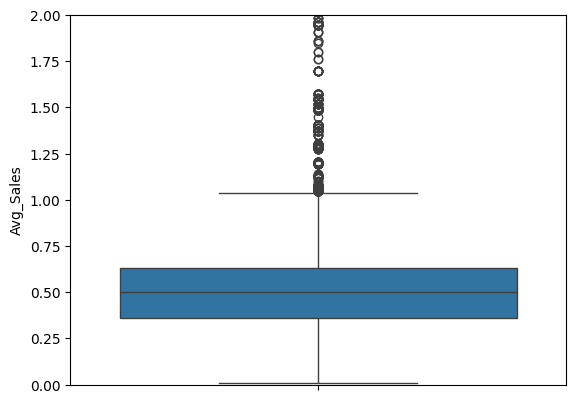

In [199]:
sns.boxplot(df_games["Avg_Sales"])
plt.ylim(0,2)

(0.0, 2.0)

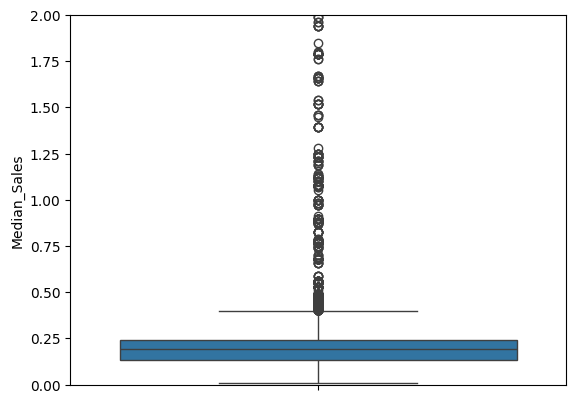

In [200]:
sns.boxplot(df_games["Median_Sales"])
plt.ylim(0,2)

In [110]:
df_games["Month_Day"].isna().sum()

np.int64(9274)

In [112]:
https://stackoverflow.com/questions/41051389/pandas-parse-non-english-string-dates

SyntaxError: invalid syntax (1387009877.py, line 1)

In [113]:
https://www.kaggle.com/datasets/floval/jvc-game-reviews

SyntaxError: invalid syntax (2823329770.py, line 1)

In [114]:
df_3 = pd.DataFrame()
fuente_3 = "jvc.csv"

In [115]:
df_3 = pd.read_csv(fuente_3)
df_3

Unnamed: 0                     game_fr                      game_en  \
0               1     .hack//G.U. Last Recode      .hack//G.U. Last Recode   
1               2  .hack//G.U. Vol.1//Rebirth  .hack//G.U. Vol. 1//Rebirth   
2               3     .hack//Infection Part 1     .hack//Infection: Part 1   
3               4      .hack//Mutation Part 2      .hack//Mutation: Part 2   
4               5      .hack//Outbreak Part 3      .hack//Outbreak: Part 3   
...           ...                         ...                          ...   
17836       17837               Zumba Fitness                Zumba Fitness   
17837       17838             Zumba Fitness 2              Zumba Fitness 2   
17838       17839          Zumba Fitness Core           Zumba Fitness Core   
17839       17840          Zumba Fitness Rush                Zumba Fitness   
17840       17841   Zumba Fitness World Party   Zumba Fitness: World Party   

      platform website_rating public_rating              publishor/developer  \
0          PS4          14/20         --/20       Bandai Namco Entertainment   
1          PS2          15/20       18.2/20       Bandai Namco CyberConnect2   
2          PS2          15/20       15.1/20             CyberConnect2 Bandai   
3          PS2          14/20       16.4/20             Bandai CyberConnect2   
4          PS2          13/20       15.3/20              CyberConnect2 Atari   
...        ...            ...           ...                              ...   
17836      360           9/20       11.7/20  Digital Bros Pipeworks Software   
17837      Wii          11/20         16/20                 Zoë Mode Majesco   
17838      360          14/20         16/20   505 Games Zoetrope Interactive   
17839      360          11/20       17.3/20               505 Games Zoë Mode   
17840      ONE          12/20       12.5/20               505 Games Zoë Mode   

                       release                   type classification  \
0             03 Novembre 2017                    RPG        +12 ans   
1      Date de sortie inconnue                    RPG         +7 ans   
2                 26 Mars 2004                    RPG        +12 ans   
3                 18 Juin 2004                    RPG        +12 ans   
4            17 Septembre 2004                    RPG        +12 ans   
...                        ...                    ...            ...   
17836         12 Novembre 2010  Rythme Coaching Sport         +3 ans   
17837          24 Février 2012        Rythme Coaching         +3 ans   
17838         09 Novembre 2012        Rythme Coaching        +12 ans   
17839          28 Février 2012                 Rythme         +3 ans   
17840             Octobre 2013                 Rythme         +3 ans   

                                                     url  \
0          http://www.jeuxvideo.com/jeux/ps4/jeu-674262/   
1      http://www.jeuxvideo.com/jeux/playstation-2-ps...   
2      http://www.jeuxvideo.com/jeux/playstation-2-ps...   
3      http://www.jeuxvideo.com/jeux/playstation-2-ps...   
4      http://www.jeuxvideo.com/jeux/playstation-2-ps...   
...                                                  ...   
17836           http://www.jeuxvideo.com/jeux/jeu-75111/   
17837           http://www.jeuxvideo.com/jeux/jeu-77041/   
17838           http://www.jeuxvideo.com/jeux/jeu-79073/   
17839  http://www.jeuxvideo.com/jeux/xbox-360/0004269...   
17840           http://www.jeuxvideo.com/jeux/jeu-80734/   

                                             description  
0      Au contraire d’autres titres, None ,''.hack'' ...  
1       Avec plus de 20 œuvres de fiction sur de mult...  
2       S'appuyant sur la maxime « Mieux vaut tard qu...  
3       Voici enfin le second volet de la quadrilogie...  
4       Comme la maxime «Jamais deux sans trois» ne c...  
...                                                  ...  
17836   Il n'a jamais été autant question d'entreteni...  
17837   Malgré une première tentative décevante et 

In [116]:
df_3['date'] = pd.to_datetime(df_3['release'], format="%d %b %Y")

ValueError: time data "03 Novembre 2017" doesn't match format "%d %b %Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [117]:
df["year"] = pd.to_datetime(df["Année"], dayfirst=True)

NameError: name 'df' is not defined

In [118]:
month_map_full = {
    "janvier": "January",
    "février": "February",
    "mars": "March",
    "avril": "April",
    "mai": "May",
    "juin": "June",
    "juillet": "July",
    "août": "August",
    "septembre": "September",
    "octobre": "October",
    "novembre": "November",
    "décembre": "December"
}

def fix_french_date(date_str):
    if not isinstance(date_str, str):
        return date_str
    date_str = date_str.lower().strip()
    for fr, en in month_map_full.items():
        date_str = date_str.replace(fr, en)
    # If the day is missing (e.g., "january 2017"), prepend a default day
    if not date_str[0].isdigit():
        date_str = "1 " + date_str
    return date_str

df_3["Année_fixed"] = df_3["release"].apply(fix_french_date)
df_3["date_French"] = pd.to_datetime(df_3["Année_fixed"], errors='coerce', format="%d %B %Y")
df_3

Unnamed: 0                     game_fr                      game_en  \
0               1     .hack//G.U. Last Recode      .hack//G.U. Last Recode   
1               2  .hack//G.U. Vol.1//Rebirth  .hack//G.U. Vol. 1//Rebirth   
2               3     .hack//Infection Part 1     .hack//Infection: Part 1   
3               4      .hack//Mutation Part 2      .hack//Mutation: Part 2   
4               5      .hack//Outbreak Part 3      .hack//Outbreak: Part 3   
...           ...                         ...                          ...   
17836       17837               Zumba Fitness                Zumba Fitness   
17837       17838             Zumba Fitness 2              Zumba Fitness 2   
17838       17839          Zumba Fitness Core           Zumba Fitness Core   
17839       17840          Zumba Fitness Rush                Zumba Fitness   
17840       17841   Zumba Fitness World Party   Zumba Fitness: World Party   

      platform website_rating public_rating              publishor/developer  \
0          PS4          14/20         --/20       Bandai Namco Entertainment   
1          PS2          15/20       18.2/20       Bandai Namco CyberConnect2   
2          PS2          15/20       15.1/20             CyberConnect2 Bandai   
3          PS2          14/20       16.4/20             Bandai CyberConnect2   
4          PS2          13/20       15.3/20              CyberConnect2 Atari   
...        ...            ...           ...                              ...   
17836      360           9/20       11.7/20  Digital Bros Pipeworks Software   
17837      Wii          11/20         16/20                 Zoë Mode Majesco   
17838      360          14/20         16/20   505 Games Zoetrope Interactive   
17839      360          11/20       17.3/20               505 Games Zoë Mode   
17840      ONE          12/20       12.5/20               505 Games Zoë Mode   

                       release                   type classification  \
0             03 Novembre 2017                    RPG        +12 ans   
1      Date de sortie inconnue                    RPG         +7 ans   
2                 26 Mars 2004                    RPG        +12 ans   
3                 18 Juin 2004                    RPG        +12 ans   
4            17 Septembre 2004                    RPG        +12 ans   
...                        ...                    ...            ...   
17836         12 Novembre 2010  Rythme Coaching Sport         +3 ans   
17837          24 Février 2012        Rythme Coaching         +3 ans   
17838         09 Novembre 2012        Rythme Coaching        +12 ans   
17839          28 Février 2012                 Rythme         +3 ans   
17840             Octobre 2013                 Rythme         +3 ans   

                                                     url  \
0          http://www.jeuxvideo.com/jeux/ps4/jeu-674262/   
1      http://www.jeuxvideo.com/jeux/playstation-2-ps...   
2      http://www.jeuxvideo.com/jeux/playstation-2-ps...   
3      http://www.jeuxvideo.com/jeux/playstation-2-ps...   
4      http://www.jeuxvideo.com/jeux/playstation-2-ps...   
...                                                  ...   
17836           http://www.jeuxvideo.com/jeux/jeu-75111/   
17837           http://www.jeuxvideo.com/jeux/jeu-77041/   
17838           http://www.jeuxvideo.com/jeux/jeu-79073/   
17839  http://www.jeuxvideo.com/jeux/xbox-360/0004269...   
17840           http://www.jeuxvideo.com/jeux/jeu-80734/   

                                             description  \
0      Au contraire d’autres titres, None ,''.hack'' ...   
1       Avec plus de 20 œuvres de fiction sur de mult...   
2       S'appuyant sur la maxime « Mieux vaut tard qu...   
3       Voici enfin le second volet de la quadrilogie...   
4       Comme la maxime «Jamais deux sans trois» ne c...   
...                                                  ...   
17836   Il n'a jamais été autant question d'entreteni...   
17837   Malgré une première tentative décev

In [119]:
df_games

Rank_x                                              Name Platform  \
0           1                                        Wii Sports      Wii   
1           2                                 Super Mario Bros.      NES   
2           3                                    Mario Kart Wii      Wii   
3           4                                 Wii Sports Resort      Wii   
4           5                          Pokemon Red/Pokemon Blue       GB   
...       ...                                               ...      ...   
16737   16596                Woody Woodpecker in Crazy Castle 5      GBA   
16738   16597                     Men in Black II: Alien Escape       GC   
16739   16598  SCORE International Baja 1000: The Official Game      PS2   
16740   16599                                        Know How 2       DS   
16741   16600                                  Spirits & Spells      GBA   

       Year_x         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0        2006        Sports    Nintendo     41.49     29.02      3.77   
1        1985      Platform    Nintendo     29.08      3.58      6.81   
2        2008        Racing    Nintendo     15.85     12.88      3.79   
3        2009        Sports    Nintendo     15.75     11.01      3.28   
4        1996  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16737    2002      Platform       Kemco      0.01      0.00      0.00   
16738    2003       Shooter  Infogrames      0.01      0.00      0.00   
16739    2008        Racing  Activision      0.00      0.00      0.00   
16740    2010        Puzzle    7G//AMES      0.00      0.01      0.00   
16741    2003      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  Score Month_Day  Year_y  Rank_y  \
0             8.46         82.74   76.0    NOV 19  2006.0     NaN   
1             0.77         40.24   84.0     JUN 2  2004.0     NaN   
2             3.31         35.82   82.0    APR 27  2008.0     NaN   
3             2.96         33.00   80.0    JUL 26  2009.0     NaN   
4             1.00         31.37    NaN       NaN     NaN     NaN   
...            ...           ...    ...       ...     ...     ...   
16737         0.00          0.01    NaN       NaN     NaN     NaN   
16738         0.00          0.01   50.0    JUN 28  2002.0     NaN   
16739         0.00          0.01    NaN       NaN     NaN     NaN   
16740         0.00          0.01    NaN       NaN     NaN     NaN   
16741         0.00          0.01   50.0    SEP 24  2003.0     NaN   

                                Game       date  Avg_Sales  Sales_Diff  \
0                         Wii Sports 2006-11-19   0.970563   81.769437   
1                  Super Mario Bros. 1985-06-02  10.792500   29.447500   
2                     Mario Kart Wii 2008-04-27   0.852169   34.967831   
3                  Wii Sports Resort 2009-07-26   0.741123   32.258877   
4                                NaN        NaT   1.570000   29.800000   
...                              ...        ...        ...         ...   
16737                            NaN        NaT   0.592949   -0.582949   
16738  Men in Black II: Alien Escape 2003-06-28   0.355325   -0.345325   
16739                            NaN        NaT   0.852169   -0.842169   
16740                            NaN        NaT   0.246250   -0.236250   
16741               Spirits & Spells 2003-09-24   0.492989   -0.482989   

       Median_Sales  
0             0.170  
1             1.210  
2             0.200  
3             0.200  
4             0.260  
...             ...  
16737         0.255  
16738         0.130  
16739         0.200  
16740         0.115  
16741         0.210  

[16742 rows x 20 columns]

In [120]:
french_date_mapping = dict(zip(df_3["game_en"], df_3["date_French"]))

In [121]:
df_games["date"] = df_games["date"].fillna(df_games["Name"].map(french_date_mapping))

In [122]:
df_games["date"].isna().sum()

np.int64(7816)

In [123]:
df_games["Score"].isna().sum()

np.int64(9284)

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

KeyboardInterrupt: 

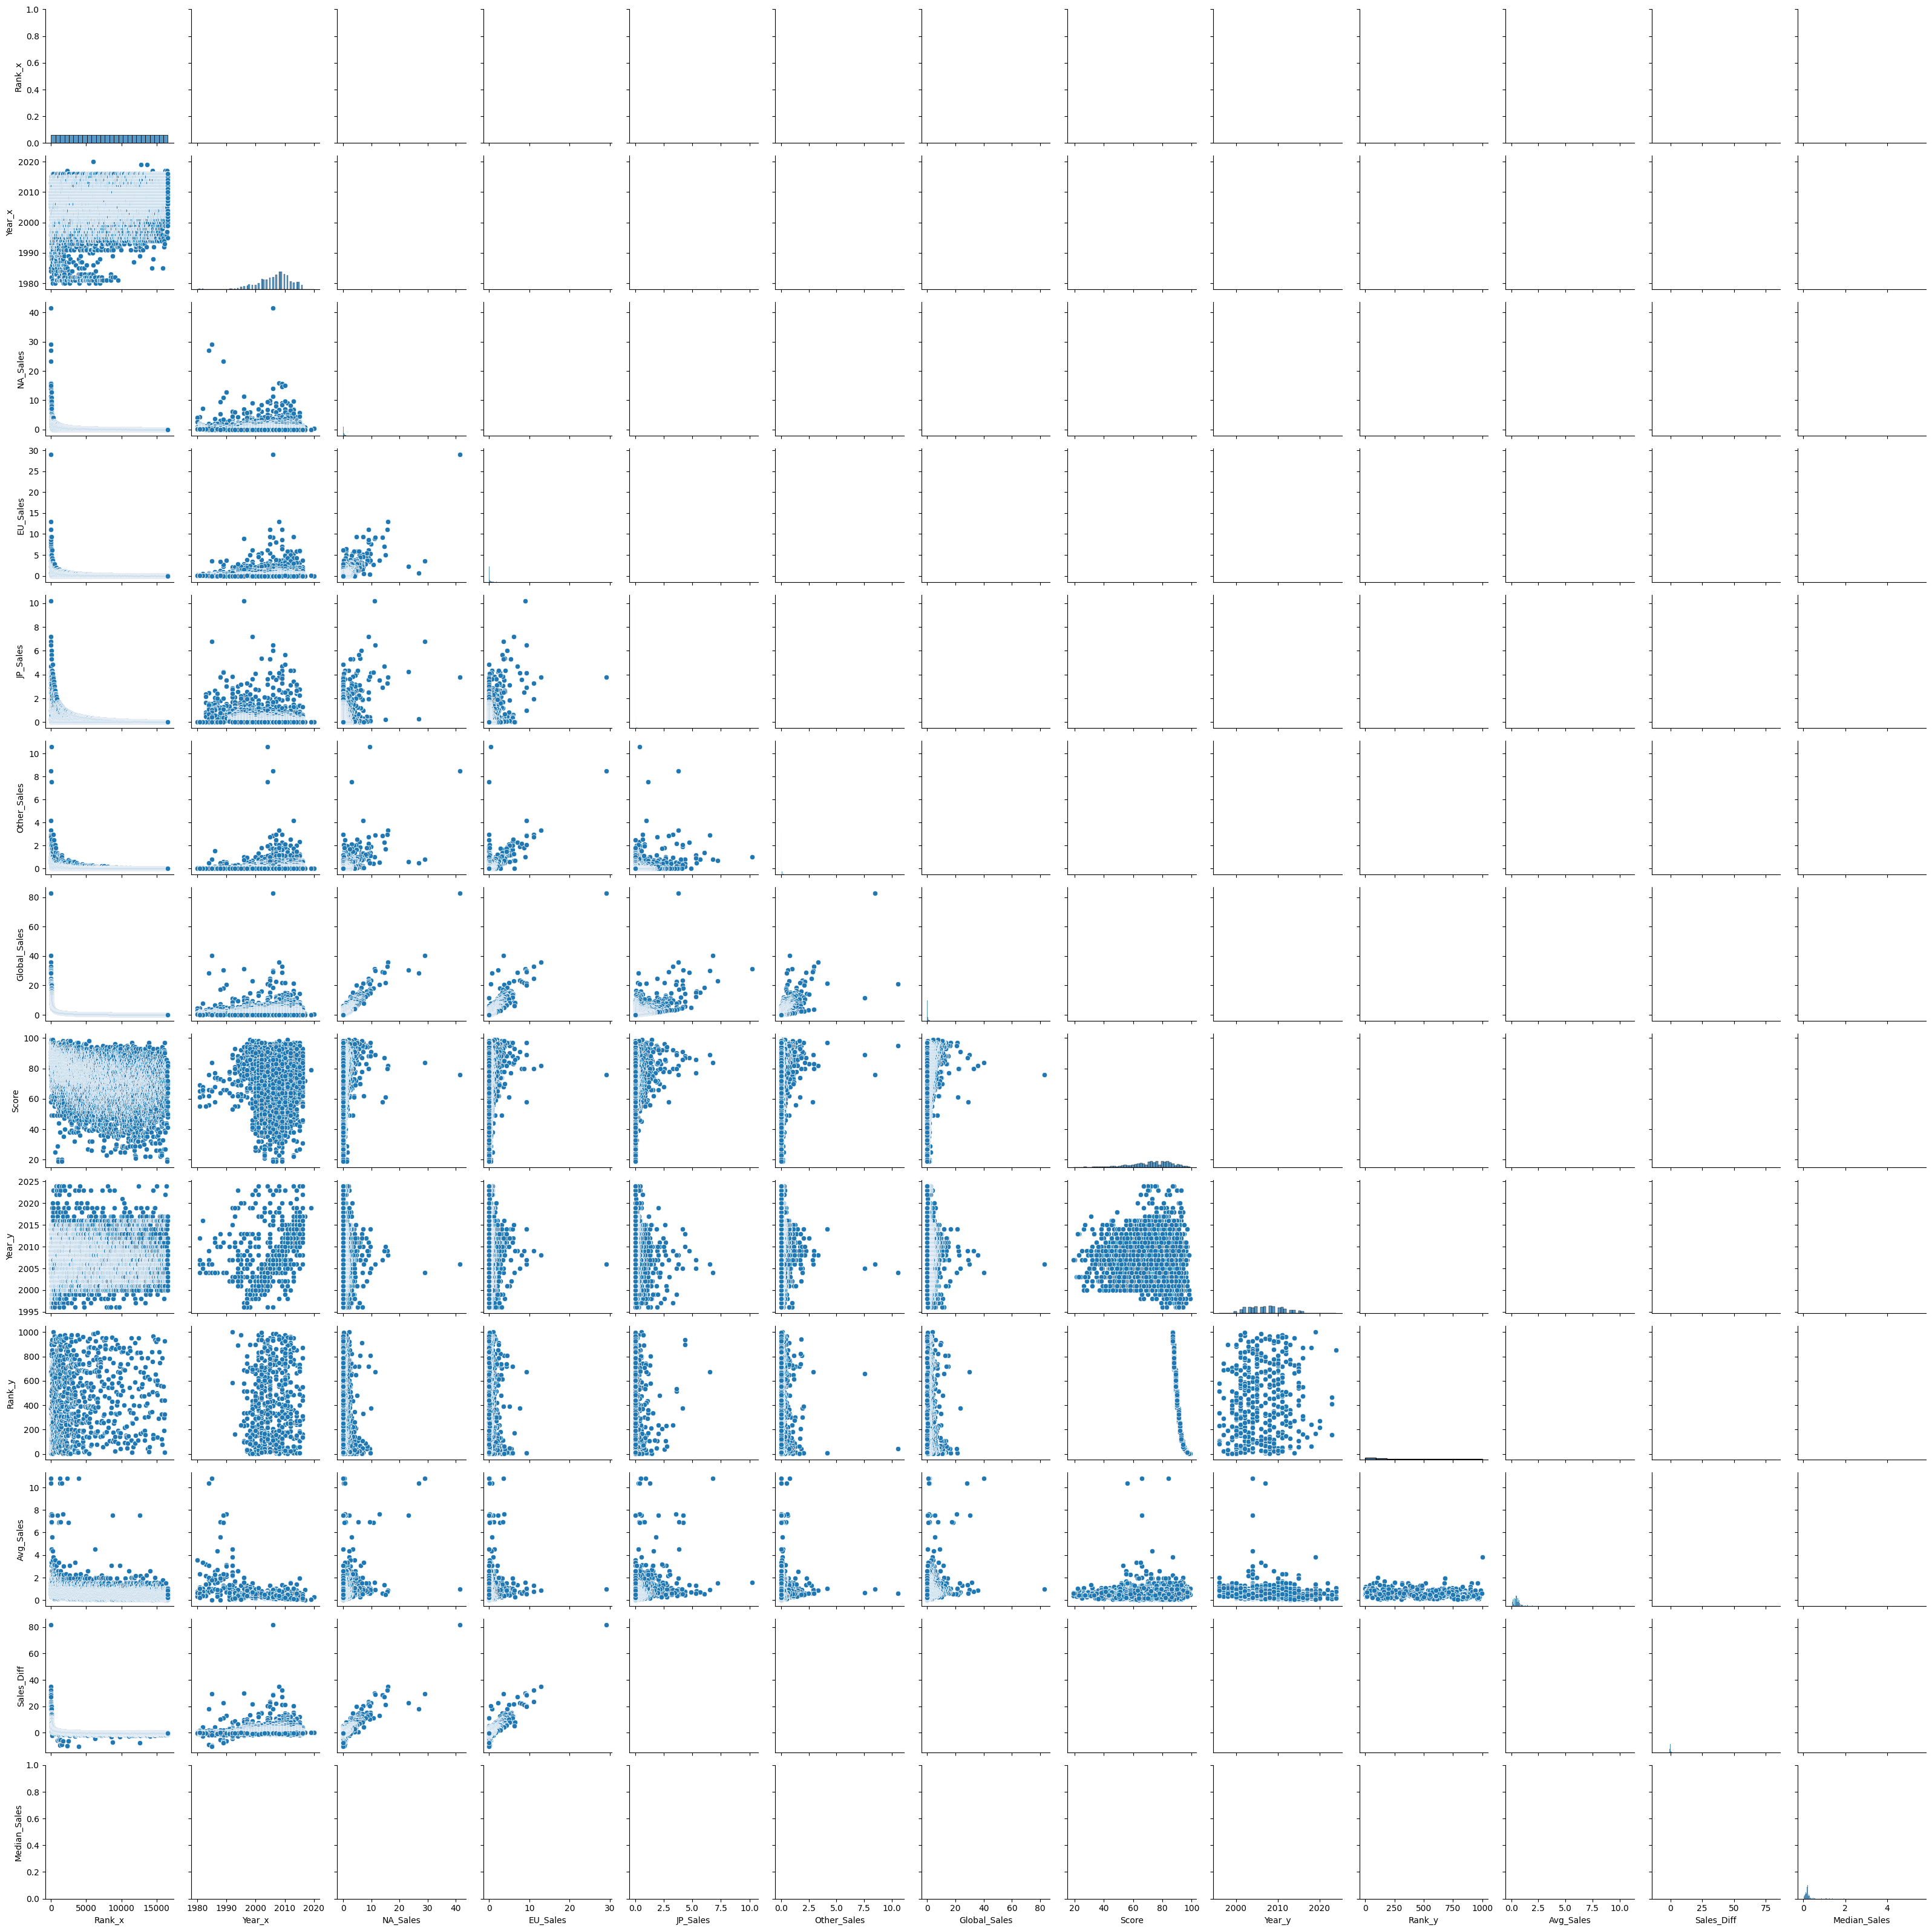

In [129]:
sns.pairplot(df_games)

# Score against Global Sales

# Score against sales diff

# Sales diff against avg sales

In [126]:
df_games

Rank_x                                              Name Platform  \
0           1                                        Wii Sports      Wii   
1           2                                 Super Mario Bros.      NES   
2           3                                    Mario Kart Wii      Wii   
3           4                                 Wii Sports Resort      Wii   
4           5                          Pokemon Red/Pokemon Blue       GB   
...       ...                                               ...      ...   
16737   16596                Woody Woodpecker in Crazy Castle 5      GBA   
16738   16597                     Men in Black II: Alien Escape       GC   
16739   16598  SCORE International Baja 1000: The Official Game      PS2   
16740   16599                                        Know How 2       DS   
16741   16600                                  Spirits & Spells      GBA   

       Year_x         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0        2006        Sports    Nintendo     41.49     29.02      3.77   
1        1985      Platform    Nintendo     29.08      3.58      6.81   
2        2008        Racing    Nintendo     15.85     12.88      3.79   
3        2009        Sports    Nintendo     15.75     11.01      3.28   
4        1996  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16737    2002      Platform       Kemco      0.01      0.00      0.00   
16738    2003       Shooter  Infogrames      0.01      0.00      0.00   
16739    2008        Racing  Activision      0.00      0.00      0.00   
16740    2010        Puzzle    7G//AMES      0.00      0.01      0.00   
16741    2003      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  Score Month_Day  Year_y  Rank_y  \
0             8.46         82.74   76.0    NOV 19  2006.0     NaN   
1             0.77         40.24   84.0     JUN 2  2004.0     NaN   
2             3.31         35.82   82.0    APR 27  2008.0     NaN   
3             2.96         33.00   80.0    JUL 26  2009.0     NaN   
4             1.00         31.37    NaN       NaN     NaN     NaN   
...            ...           ...    ...       ...     ...     ...   
16737         0.00          0.01    NaN       NaN     NaN     NaN   
16738         0.00          0.01   50.0    JUN 28  2002.0     NaN   
16739         0.00          0.01    NaN       NaN     NaN     NaN   
16740         0.00          0.01    NaN       NaN     NaN     NaN   
16741         0.00          0.01   50.0    SEP 24  2003.0     NaN   

                                Game       date  Avg_Sales  Sales_Diff  \
0                         Wii Sports 2006-11-19   0.970563   81.769437   
1                  Super Mario Bros. 1985-06-02  10.792500   29.447500   
2                     Mario Kart Wii 2008-04-27   0.852169   34.967831   
3                  Wii Sports Resort 2009-07-26   0.741123   32.258877   
4                                NaN        NaT   1.570000   29.800000   
...                              ...        ...        ...         ...   
16737                            NaN        NaT   0.592949   -0.582949   
16738  Men in Black II: Alien Escape 2003-06-28   0.355325   -0.345325   
16739                            NaN        NaT   0.852169   -0.842169   
16740                            NaN        NaT   0.246250   -0.236250   
16741               Spirits & Spells 2003-09-24   0.492989   -0.482989   

       Median_Sales  
0             0.170  
1             1.210  
2             0.200  
3             0.200  
4             0.260  
...             ...  
16737         0.255  
16738         0.130  
16739         0.200  
16740         0.115  
16741         0.210  

[16742 rows x 20 columns]

In [127]:
df_games_cleaned = df_games.drop(columns=["Month_Day", "Year_y", "Rank_y"])
df_games_gigcleaned = df_games_cleaned.dropna()

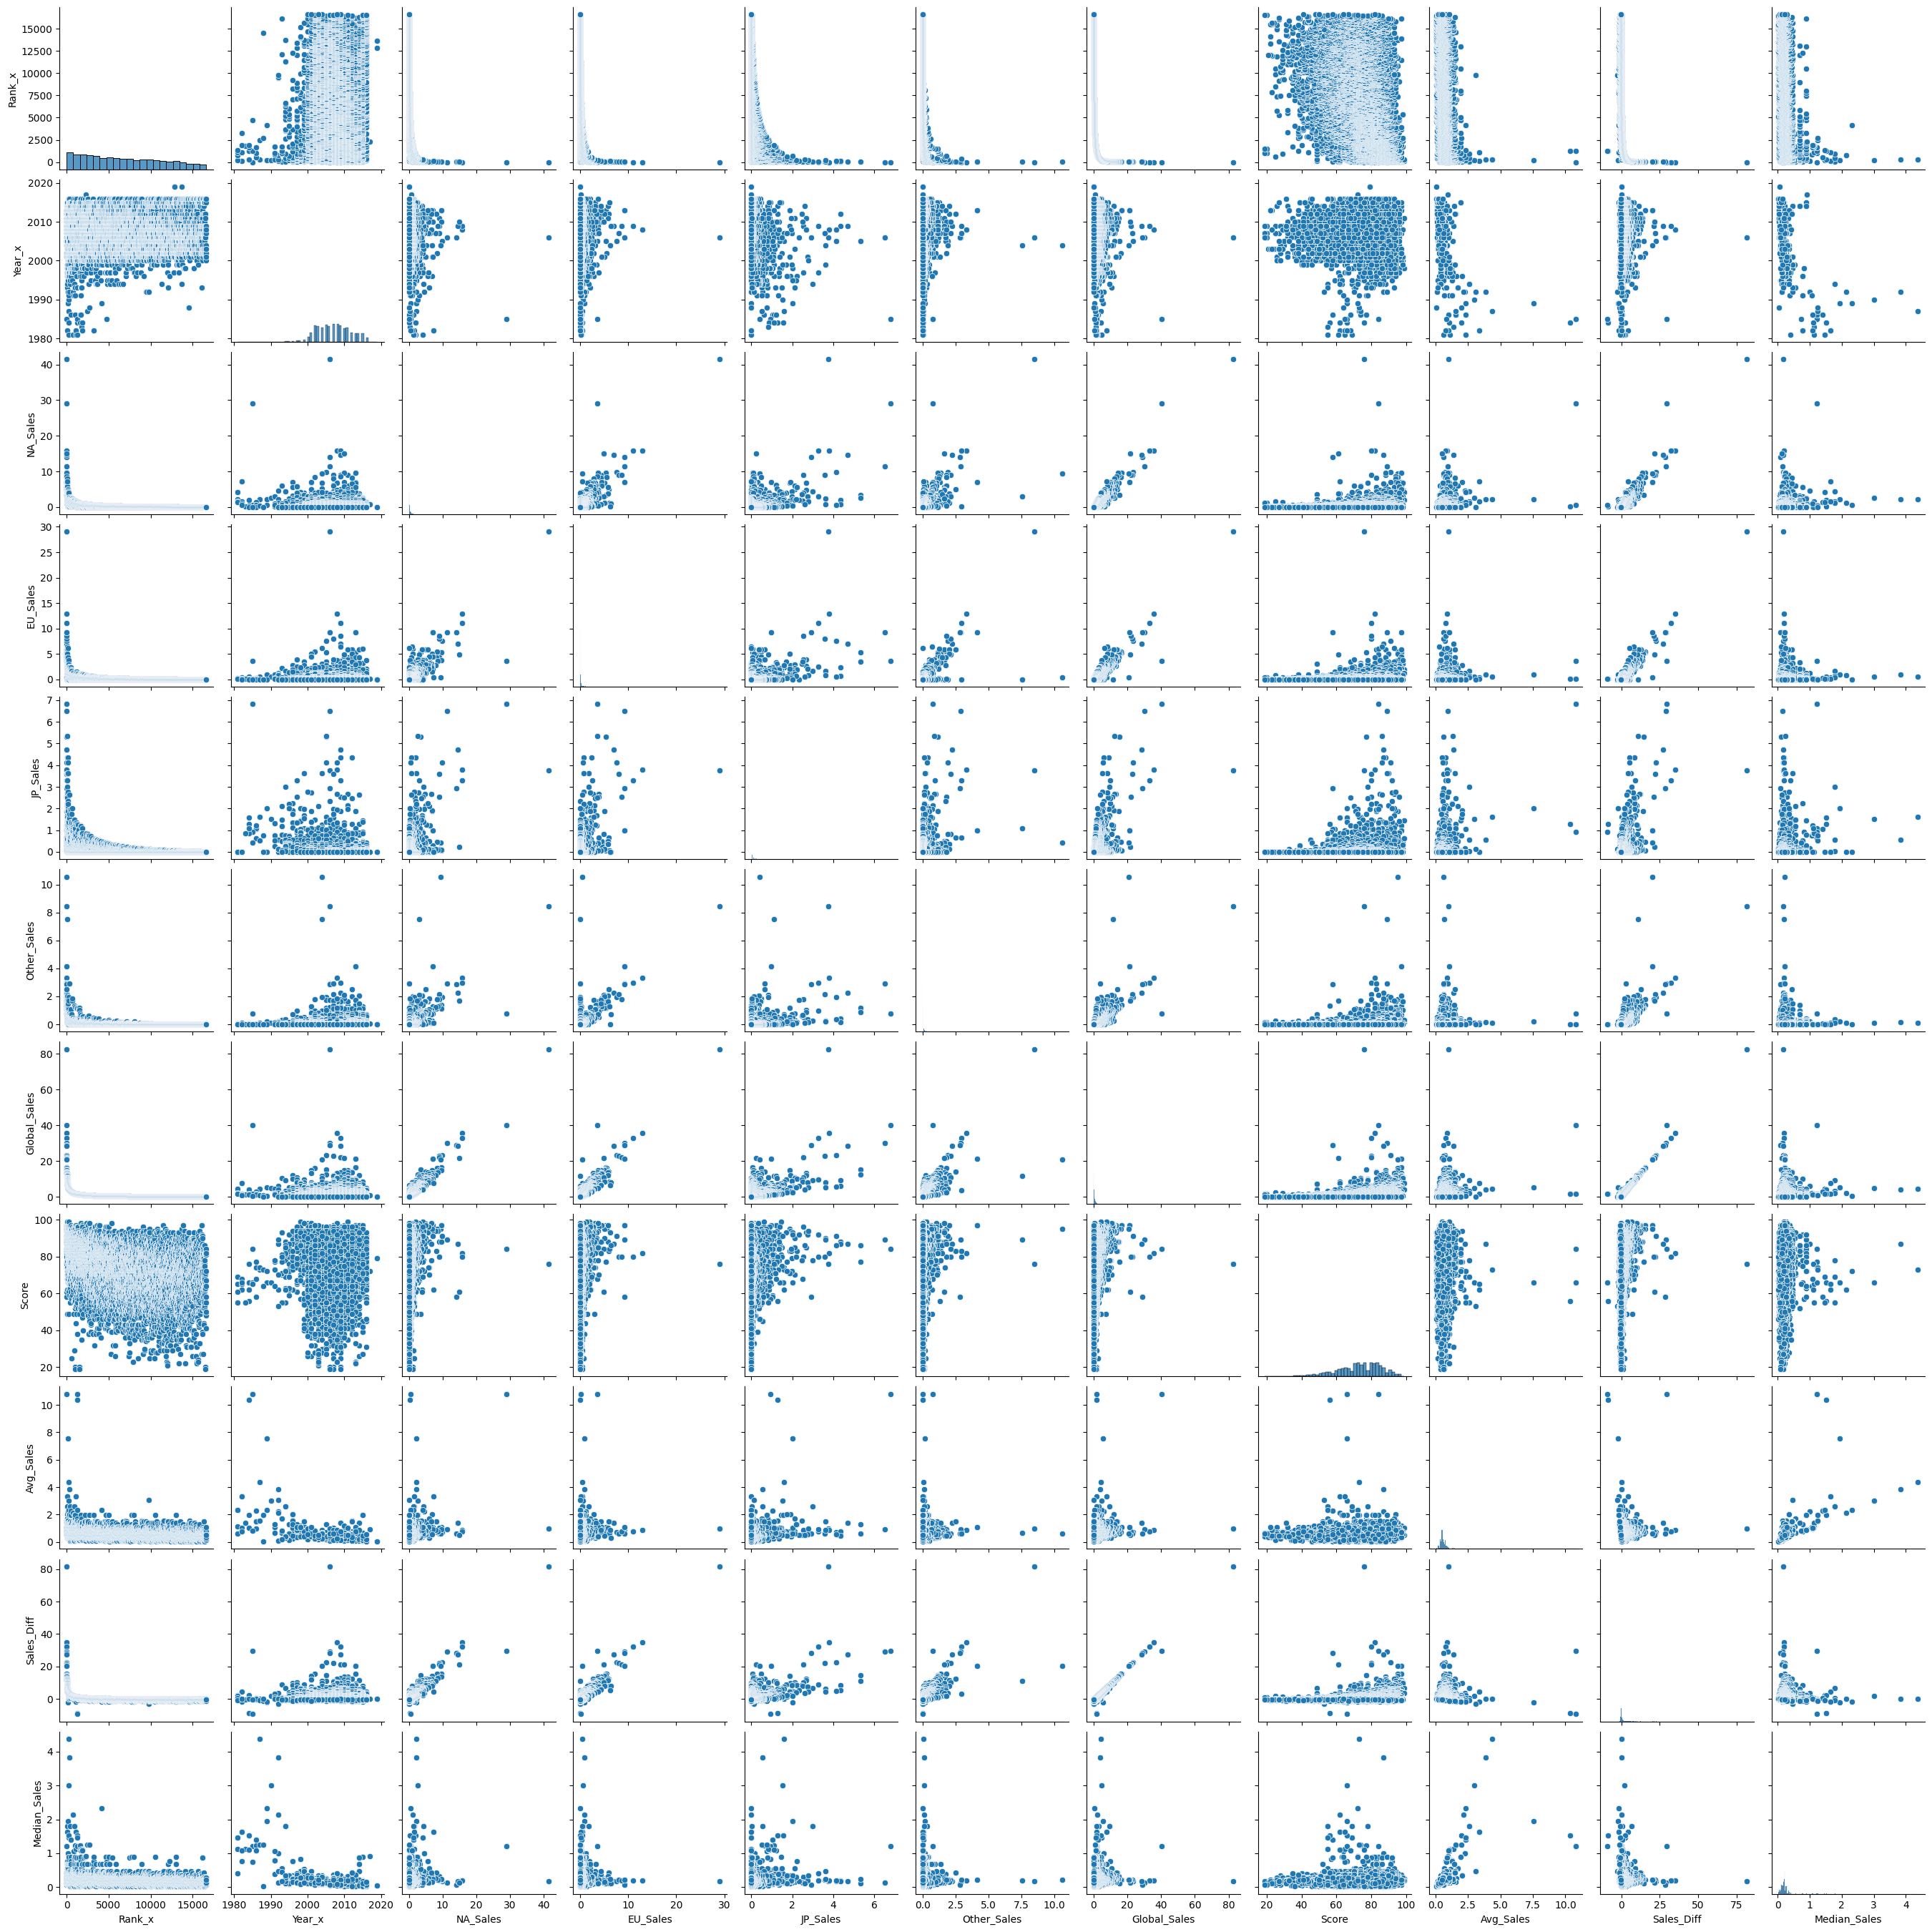

In [128]:
sns.pairplot(df_games_gigcleaned)

In [130]:
df_games_gigcleaned2 = df_games_gigcleaned[df_games_gigcleaned["Year_x"] >= 1995]


In [131]:
df_games_gigcleaned2 = df_games_gigcleaned2[df_games_gigcleaned2["Year_x"] <= 2015]

In [132]:
df_games_gigcleaned2

Rank_x                            Name Platform  Year_x      Genre  \
0           1                      Wii Sports      Wii    2006     Sports   
2           3                  Mario Kart Wii      Wii    2008     Racing   
3           4               Wii Sports Resort      Wii    2009     Sports   
6           7           New Super Mario Bros.       DS    2006   Platform   
7           8                        Wii Play      Wii    2006       Misc   
...       ...                             ...      ...     ...        ...   
16730   16589  Secret Files 2: Puritas Cordis       DS    2009  Adventure   
16732   16591                Mega Brain Boost       DS    2008     Puzzle   
16735   16594             Myst IV: Revelation       PC    2004  Adventure   
16738   16597   Men in Black II: Alien Escape       GC    2003    Shooter   
16741   16600                Spirits & Spells      GBA    2003   Platform   

                   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0                   Nintendo     41.49     29.02      3.77         8.46   
2                   Nintendo     15.85     12.88      3.79         3.31   
3                   Nintendo     15.75     11.01      3.28         2.96   
6                   Nintendo     11.38      9.23      6.50         2.90   
7                   Nintendo     14.03      9.20      2.93         2.85   
...                      ...       ...       ...       ...          ...   
16730            Deep Silver      0.00      0.01      0.00         0.00   
16732  Majesco Entertainment      0.01      0.00      0.00         0.00   
16735                Ubisoft      0.01      0.00      0.00         0.00   
16738             Infogrames      0.01      0.00      0.00         0.00   
16741                Wanadoo      0.01      0.00      0.00         0.00   

       Global_Sales  Score                            Game       date  \
0             82.74   76.0                      Wii Sports 2006-11-19   
2             35.82   82.0                  Mario Kart Wii 2008-04-27   
3             33.00   80.0               Wii Sports Resort 2009-07-26   
6             30.01   89.0           New Super Mario Bros. 2006-05-15   
7             29.02   58.0                        Wii Play 2006-02-12   
...             ...    ...                             ...        ...   
16730          0.01   64.0  Secret Files 2: Puritas Cordis 2009-10-29   
16732          0.01   48.0                Mega Brain Boost 2008-01-22   
16735          0.01   82.0             Myst IV: Revelation 2004-09-30   
16738          0.01   50.0   Men in Black II: Alien Escape 2003-06-28   
16741          0.01   50.0                Spirits & Spells 2003-09-24   

       Avg_Sales  Sales_Diff  Median_Sales  
0       0.970563   81.769437         0.170  
2       0.852169   34.967831         0.200  
3       0.741123   32.258877         0.200  
6       0.906364   29.103636         0.140  
7       0.609009   28.410991         0.070  
...          ...         ...           ...  
16730   0.152727   -0.142727         0.060  
16732   0.243594   -0.233594         0.095  
16735   0.223077   -0.213077         0.120  
16738   0.355325   -0.345325         0.130  
16741   0.492989   -0.482989         0.210  

[7235 rows x 17 columns]

<Axes: ylabel='Avg_Sales'>

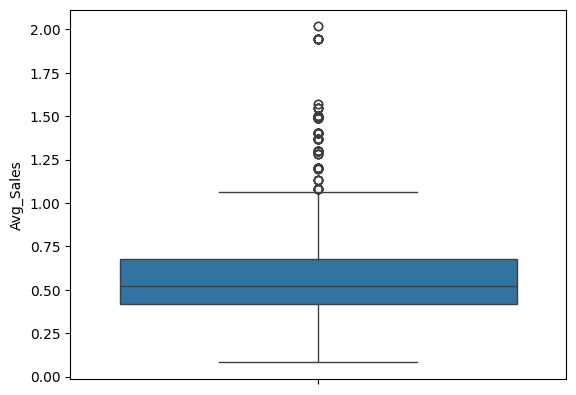

In [133]:
sns.boxplot(df_games_gigcleaned2["Avg_Sales"])

<Axes: ylabel='Median_Sales'>

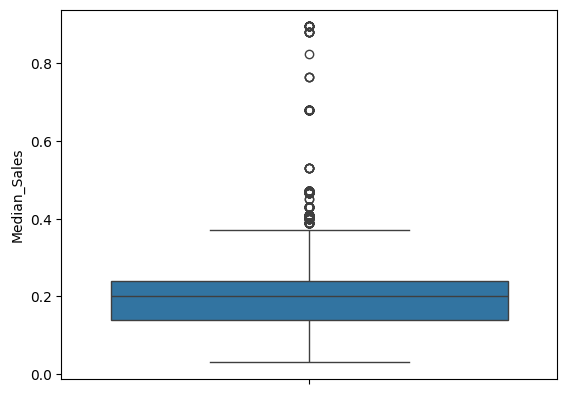

In [134]:
sns.boxplot(df_games_gigcleaned2["Median_Sales"])

<Axes: ylabel='Sales_Diff'>

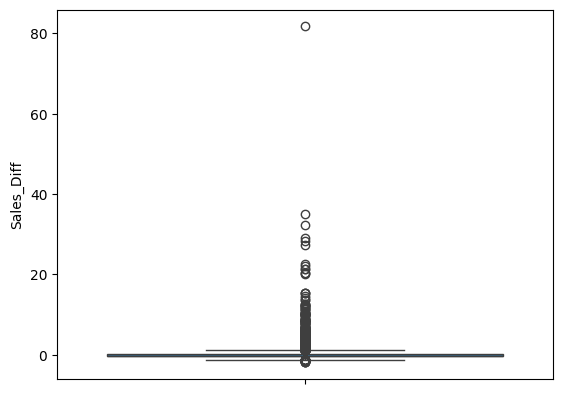

In [135]:
sns.boxplot(df_games_gigcleaned2["Sales_Diff"])

In [136]:
df_games_gigcleaned["Genre"].value_counts()

Genre
Action          1690
Sports          1185
Shooter          806
Role-Playing     738
Racing           650
Platform         470
Misc             446
Fighting         388
Simulation       309
Adventure        292
Strategy         285
Puzzle           193
Name: count, dtype: int64

In [140]:
df_games_gigcleaned2

Rank_x                            Name Platform  Year_x      Genre  \
0           1                      Wii Sports      Wii    2006     Sports   
2           3                  Mario Kart Wii      Wii    2008     Racing   
3           4               Wii Sports Resort      Wii    2009     Sports   
6           7           New Super Mario Bros.       DS    2006   Platform   
7           8                        Wii Play      Wii    2006       Misc   
...       ...                             ...      ...     ...        ...   
16730   16589  Secret Files 2: Puritas Cordis       DS    2009  Adventure   
16732   16591                Mega Brain Boost       DS    2008     Puzzle   
16735   16594             Myst IV: Revelation       PC    2004  Adventure   
16738   16597   Men in Black II: Alien Escape       GC    2003    Shooter   
16741   16600                Spirits & Spells      GBA    2003   Platform   

                   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  ...  \
0                   Nintendo     41.49     29.02      3.77         8.46  ...   
2                   Nintendo     15.85     12.88      3.79         3.31  ...   
3                   Nintendo     15.75     11.01      3.28         2.96  ...   
6                   Nintendo     11.38      9.23      6.50         2.90  ...   
7                   Nintendo     14.03      9.20      2.93         2.85  ...   
...                      ...       ...       ...       ...          ...  ...   
16730            Deep Silver      0.00      0.01      0.00         0.00  ...   
16732  Majesco Entertainment      0.01      0.00      0.00         0.00  ...   
16735                Ubisoft      0.01      0.00      0.00         0.00  ...   
16738             Infogrames      0.01      0.00      0.00         0.00  ...   
16741                Wanadoo      0.01      0.00      0.00         0.00  ...   

       Score                            Game       date Avg_Sales  Sales_Diff  \
0       76.0                      Wii Sports 2006-11-19  0.970563   81.769437   
2       82.0                  Mario Kart Wii 2008-04-27  0.852169   34.967831   
3       80.0               Wii Sports Resort 2009-07-26  0.741123   32.258877   
6       89.0           New Super Mario Bros. 2006-05-15  0.906364   29.103636   
7       58.0                        Wii Play 2006-02-12  0.609009   28.410991   
...      ...                             ...        ...       ...         ...   
16730   64.0  Secret Files 2: Puritas Cordis 2009-10-29  0.152727   -0.142727   
16732   48.0                Mega Brain Boost 2008-01-22  0.243594   -0.233594   
16735   82.0             Myst IV: Revelation 2004-09-30  0.223077   -0.213077   
16738   50.0   Men in Black II: Alien Escape 2003-06-28  0.355325   -0.345325   
16741   50.0                Spirits & Spells 2003-09-24  0.492989   -0.482989   

       Median_Sales  Year_Exact  Month_Exact      start        end  
0             0.170        2006           11 2006-10-19 2006-12-19  
2             0.200        2008            4 2008-03-27 2008-05-27  
3             0.200        2009            7 2009-06-26 2009-08-26  
6             0.140        2006            5 2006-04-15 2006-06-15  
7             0.070        2006            2 2006-01-12 2006-03-12  
...             ...         ...          ...        ...        ...  
16730         0.060        2009           10 2009-09-29 2009-11-29  
16732         0.095        2008            1 2007-12-22 2008-02-22  
16735         0.120        2004            9 2004-08-30 2004-10-30  
16738         0.130        2003            6 2003-05-28 2003-07-28  
16741         0.210        2003            9 2003-08-24 2003-10-24  

[7235 rows x 21 columns]

In [137]:
df_games_gigcleaned2['Year_Exact'] = df_games_gigcleaned2['date'].dt.year
df_games_gigcleaned2['Month_Exact'] = df_games_gigcleaned2['date'].dt.month

In [141]:
df_games_gigcleaned2['start'] = df_games_gigcleaned2['date'] - pd.DateOffset(months=1)
df_games_gigcleaned2['end']   = df_games_gigcleaned2['date'] + pd.DateOffset(months=1)

def freq_count(row):
    mask = (
        (df_games_gigcleaned2['Genre'] == row['Genre']) &
        (df_games_gigcleaned2['date'] >= row['start'])   &
        (df_games_gigcleaned2['date'] <= row['end'])
    )
    return df_games_gigcleaned2.loc[mask].shape[0] - 1



In [142]:
df_games_gigcleaned2['Game Frequency'] = df_games_gigcleaned2.apply(freq_count, axis=1)

In [143]:
df_games_gigcleaned2

Rank_x                            Name Platform  Year_x      Genre  \
0           1                      Wii Sports      Wii    2006     Sports   
2           3                  Mario Kart Wii      Wii    2008     Racing   
3           4               Wii Sports Resort      Wii    2009     Sports   
6           7           New Super Mario Bros.       DS    2006   Platform   
7           8                        Wii Play      Wii    2006       Misc   
...       ...                             ...      ...     ...        ...   
16730   16589  Secret Files 2: Puritas Cordis       DS    2009  Adventure   
16732   16591                Mega Brain Boost       DS    2008     Puzzle   
16735   16594             Myst IV: Revelation       PC    2004  Adventure   
16738   16597   Men in Black II: Alien Escape       GC    2003    Shooter   
16741   16600                Spirits & Spells      GBA    2003   Platform   

                   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  ...  \
0                   Nintendo     41.49     29.02      3.77         8.46  ...   
2                   Nintendo     15.85     12.88      3.79         3.31  ...   
3                   Nintendo     15.75     11.01      3.28         2.96  ...   
6                   Nintendo     11.38      9.23      6.50         2.90  ...   
7                   Nintendo     14.03      9.20      2.93         2.85  ...   
...                      ...       ...       ...       ...          ...  ...   
16730            Deep Silver      0.00      0.01      0.00         0.00  ...   
16732  Majesco Entertainment      0.01      0.00      0.00         0.00  ...   
16735                Ubisoft      0.01      0.00      0.00         0.00  ...   
16738             Infogrames      0.01      0.00      0.00         0.00  ...   
16741                Wanadoo      0.01      0.00      0.00         0.00  ...   

                                 Game       date Avg_Sales Sales_Diff  \
0                          Wii Sports 2006-11-19  0.970563  81.769437   
2                      Mario Kart Wii 2008-04-27  0.852169  34.967831   
3                   Wii Sports Resort 2009-07-26  0.741123  32.258877   
6               New Super Mario Bros. 2006-05-15  0.906364  29.103636   
7                            Wii Play 2006-02-12  0.609009  28.410991   
...                               ...        ...       ...        ...   
16730  Secret Files 2: Puritas Cordis 2009-10-29  0.152727  -0.142727   
16732                Mega Brain Boost 2008-01-22  0.243594  -0.233594   
16735             Myst IV: Revelation 2004-09-30  0.223077  -0.213077   
16738   Men in Black II: Alien Escape 2003-06-28  0.355325  -0.345325   
16741                Spirits & Spells 2003-09-24  0.492989  -0.482989   

       Median_Sales  Year_Exact  Month_Exact      start        end  \
0             0.170        2006           11 2006-10-19 2006-12-19   
2             0.200        2008            4 2008-03-27 2008-05-27   
3             0.200        2009            7 2009-06-26 2009-08-26   
6             0.140        2006            5 2006-04-15 2006-06-15   
7             0.070        2006            2 2006-01-12 2006-03-12   
...             ...         ...          ...        ...        ...   
16730         0.060        2009           10 2009-09-29 2009-11-29   
16732         0.095        2008            1 2007-12-22 2008-02-22   
16735         0.120        2004            9 2004-08-30 2004-10-30   
16738         0.130        2003            6 2003-05-28 2003-07-28   
16741         0.210        2003            9 2003-08-24 2003-10-24   

      Game Frequency  
0                 20  
2                  1  
3                 10  
6                  5  
7                  0  
...              ...  
16730              9  
16732              0  
16735              6  
16738              6  
16741             14  

[7235 rows x 22 columns]

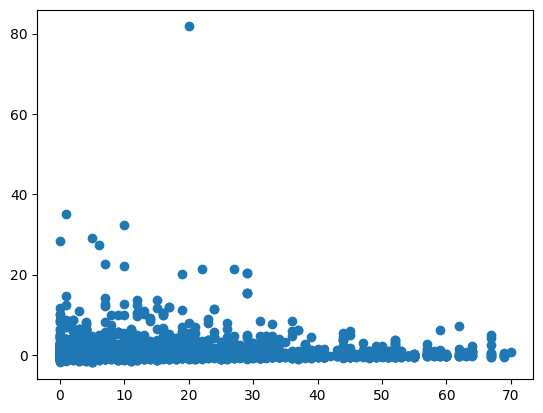

In [144]:

plt.scatter(df_games_gigcleaned2['Game Frequency'], df_games_gigcleaned2['Sales_Diff'])

In [156]:
df_games_gigcleaned2['Percentage_Sales'] = (df_games_gigcleaned2['Global_Sales'] / df_games_gigcleaned2['Avg_Sales'])
df_games_gigcleaned2

Rank_x                            Name Platform  Year_x      Genre  \
0           1                      Wii Sports      Wii    2006     Sports   
2           3                  Mario Kart Wii      Wii    2008     Racing   
3           4               Wii Sports Resort      Wii    2009     Sports   
6           7           New Super Mario Bros.       DS    2006   Platform   
7           8                        Wii Play      Wii    2006       Misc   
...       ...                             ...      ...     ...        ...   
16730   16589  Secret Files 2: Puritas Cordis       DS    2009  Adventure   
16732   16591                Mega Brain Boost       DS    2008     Puzzle   
16735   16594             Myst IV: Revelation       PC    2004  Adventure   
16738   16597   Men in Black II: Alien Escape       GC    2003    Shooter   
16741   16600                Spirits & Spells      GBA    2003   Platform   

                   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  ...  \
0                   Nintendo     41.49     29.02      3.77         8.46  ...   
2                   Nintendo     15.85     12.88      3.79         3.31  ...   
3                   Nintendo     15.75     11.01      3.28         2.96  ...   
6                   Nintendo     11.38      9.23      6.50         2.90  ...   
7                   Nintendo     14.03      9.20      2.93         2.85  ...   
...                      ...       ...       ...       ...          ...  ...   
16730            Deep Silver      0.00      0.01      0.00         0.00  ...   
16732  Majesco Entertainment      0.01      0.00      0.00         0.00  ...   
16735                Ubisoft      0.01      0.00      0.00         0.00  ...   
16738             Infogrames      0.01      0.00      0.00         0.00  ...   
16741                Wanadoo      0.01      0.00      0.00         0.00  ...   

            date  Avg_Sales Sales_Diff Median_Sales  Year_Exact  Month_Exact  \
0     2006-11-19   0.970563  81.769437        0.170        2006           11   
2     2008-04-27   0.852169  34.967831        0.200        2008            4   
3     2009-07-26   0.741123  32.258877        0.200        2009            7   
6     2006-05-15   0.906364  29.103636        0.140        2006            5   
7     2006-02-12   0.609009  28.410991        0.070        2006            2   
...          ...        ...        ...          ...         ...          ...   
16730 2009-10-29   0.152727  -0.142727        0.060        2009           10   
16732 2008-01-22   0.243594  -0.233594        0.095        2008            1   
16735 2004-09-30   0.223077  -0.213077        0.120        2004            9   
16738 2003-06-28   0.355325  -0.345325        0.130        2003            6   
16741 2003-09-24   0.492989  -0.482989        0.210        2003            9   

           start        end  Game Frequency Percentage_Sales  
0     2006-10-19 2006-12-19              20        85.249456  
2     2008-03-27 2008-05-27               1        42.033932  
3     2009-06-26 2009-08-26              10        44.527022  
6     2006-04-15 2006-06-15               5        33.110331  
7     2006-01-12 2006-03-12               0        47.651183  
...          ...        ...             ...              ...  
16730 2009-09-29 2009-11-29               9         0.065476  
16732 2007-12-22 2008-02-22               0         0.041052  
16735 2004-08-30 2004-10-30               6         0.044828  
16738 2003-05-28 2003-07-28               6         0.028143  
16741 2003-08-24 2003-10-24              14         0.020284  

[7235 rows x 23 columns]

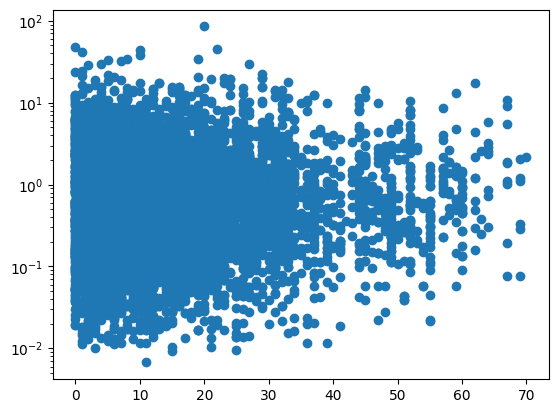

In [159]:
plt.scatter(df_games_gigcleaned2['Game Frequency'], df_games_gigcleaned2['Percentage_Sales'])
plt.yscale("log", base=10)
plt.show()


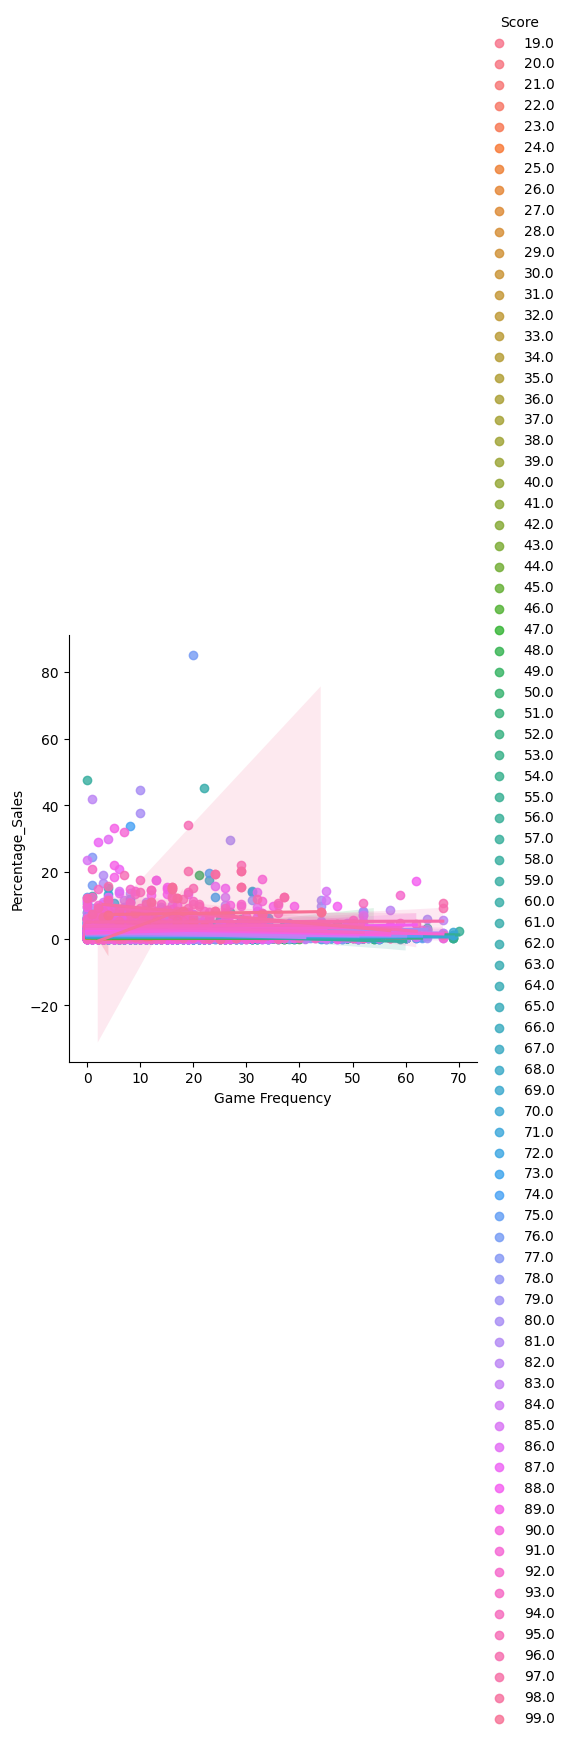

In [182]:
sns.lmplot(x ='Game Frequency', y= 'Percentage_Sales',data= df_games_gigcleaned2, hue="Score")


In [ ]:
sns.heatmap(df_games_gigcleaned2["Score":"Percentage_Sales"].corr(numeric_only=True), annot=True, cmap="coolwarm", vmin=-1)

TypeError: cannot do slice indexing on Index with these indexers [Score] of type str

In [ ]:
df_heatmap = df_games_gigcleaned2.drop(columns=["Rank_x",	"Name",	"Platform",	"Year_x",	"Genre","Publisher"	,"NA_Sales"	,"EU_Sales",	"JP_Sales"	,"Other_Sales"])
sns.heatmap

Global_Sales  Score                            Game       date  \
0             82.74   76.0                      Wii Sports 2006-11-19   
2             35.82   82.0                  Mario Kart Wii 2008-04-27   
3             33.00   80.0               Wii Sports Resort 2009-07-26   
6             30.01   89.0           New Super Mario Bros. 2006-05-15   
7             29.02   58.0                        Wii Play 2006-02-12   
...             ...    ...                             ...        ...   
16730          0.01   64.0  Secret Files 2: Puritas Cordis 2009-10-29   
16732          0.01   48.0                Mega Brain Boost 2008-01-22   
16735          0.01   82.0             Myst IV: Revelation 2004-09-30   
16738          0.01   50.0   Men in Black II: Alien Escape 2003-06-28   
16741          0.01   50.0                Spirits & Spells 2003-09-24   

       Avg_Sales  Sales_Diff  Median_Sales  Year_Exact  Month_Exact  \
0       0.970563   81.769437         0.170        2006           11   
2       0.852169   34.967831         0.200        2008            4   
3       0.741123   32.258877         0.200        2009            7   
6       0.906364   29.103636         0.140        2006            5   
7       0.609009   28.410991         0.070        2006            2   
...          ...         ...           ...         ...          ...   
16730   0.152727   -0.142727         0.060        2009           10   
16732   0.243594   -0.233594         0.095        2008            1   
16735   0.223077   -0.213077         0.120        2004            9   
16738   0.355325   -0.345325         0.130        2003            6   
16741   0.492989   -0.482989         0.210        2003            9   

           start        end  Game Frequency  Percentage_Sales  
0     2006-10-19 2006-12-19              20         85.249456  
2     2008-03-27 2008-05-27               1         42.033932  
3     2009-06-26 2009-08-26              10         44.527022  
6     2006-04-15 2006-06-15               5         33.110331  
7     2006-01-12 2006-03-12               0         47.651183  
...          ...        ...             ...               ...  
16730 2009-09-29 2009-11-29               9          0.065476  
16732 2007-12-22 2008-02-22               0          0.041052  
16735 2004-08-30 2004-10-30               6          0.044828  
16738 2003-05-28 2003-07-28               6          0.028143  
16741 2003-08-24 2003-10-24              14          0.020284  

[7235 rows x 13 columns]

<Axes: >

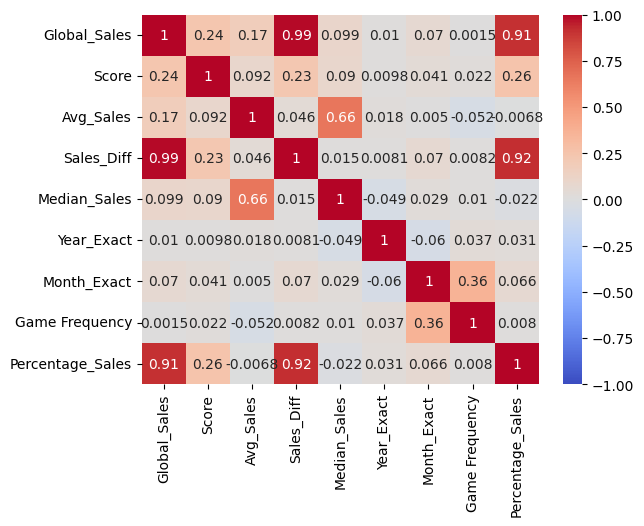

In [171]:
sns.heatmap(df_heatmap.corr(numeric_only=True), annot=True, cmap="coolwarm", vmin=-1)

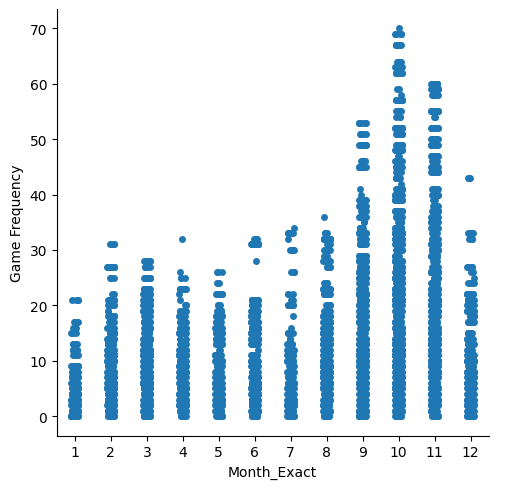

In [174]:
chart = sns.catplot(x = "Month_Exact", y="Game Frequency", data=df_heatmap)

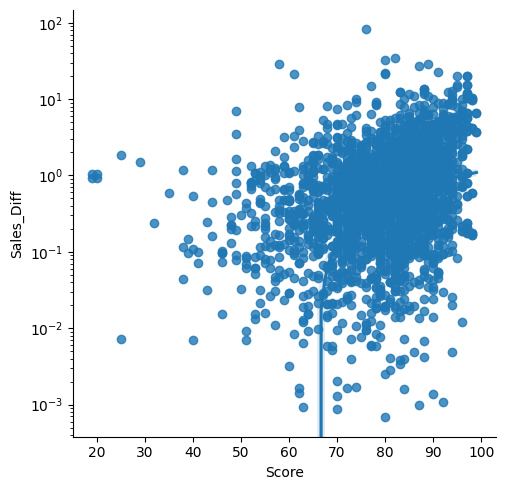

In [181]:
sns.lmplot(x ='Score', y= 'Sales_Diff',data= df_games_gigcleaned2)
plt.yscale("log", base=10)

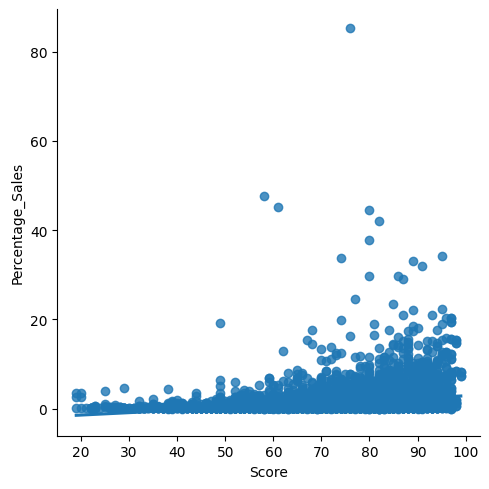

In [180]:
sns.lmplot(x ='Score', y= 'Percentage_Sales',data= df_games_gigcleaned2)


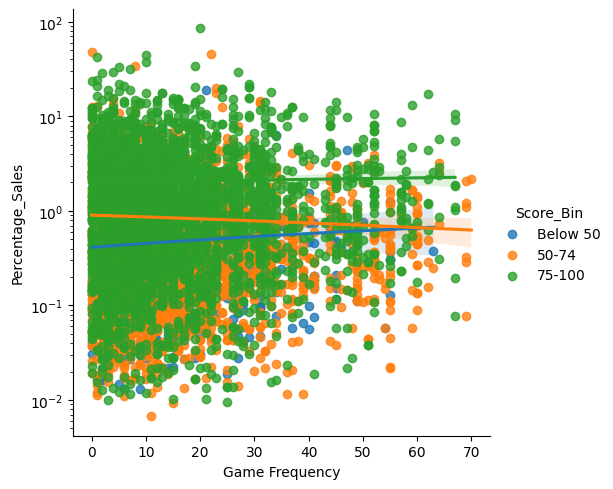

In [184]:
# 1) Define the bins and labels for Score
bins = [0, 50, 75, 100]  # or adjust these boundaries as needed
labels = ['Below 50', '50-74', '75-100']

df_games_gigcleaned2['Score_Bin'] = pd.cut(
    df_games_gigcleaned2['Score'],
    bins=bins,
    labels=labels,
    include_lowest=True  # If you want to include the lower bound
)

# 2) Plot with hue on the new binned column
sns.lmplot(
    x='Game Frequency',
    y='Percentage_Sales',
    data=df_games_gigcleaned2,
    hue='Score_Bin'
)
plt.yscale("log", base=10)
plt.show()

In [185]:
df_games_gigcleaned2['Score_Bin'].value_counts()

Score_Bin
50-74       3379
75-100      3358
Below 50     498
Name: count, dtype: int64

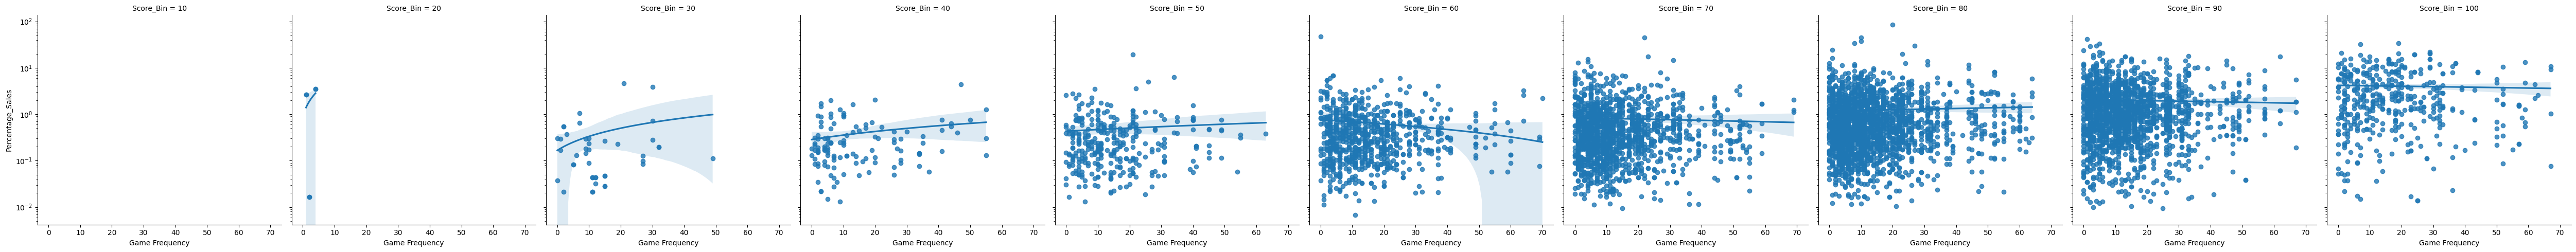

In [189]:
# 1) Define the bins and labels for Score
bins = [0,10,20,30,40, 50, 60, 70,80,90, 100]  # or adjust these boundaries as needed
labels = ["10","20","30","40", "50", "60", "70","80","90", "100"]

df_games_gigcleaned2['Score_Bin'] = pd.cut(
    df_games_gigcleaned2['Score'],
    bins=bins,
    labels=labels,
    include_lowest=True  # If you want to include the lower bound
)

# 2) Plot with hue on the new binned column
sns.lmplot(
    x='Game Frequency',
    y='Percentage_Sales',
    data=df_games_gigcleaned2,
    col='Score_Bin'
)
plt.yscale("log", base=10)
plt.show()

In [190]:
df_games_gigcleaned2['Score_Bin'].value_counts()

Score_Bin
80     2192
90     1803
70     1497
60      801
100     444
50      326
40      123
30       43
20        6
10        0
Name: count, dtype: int64

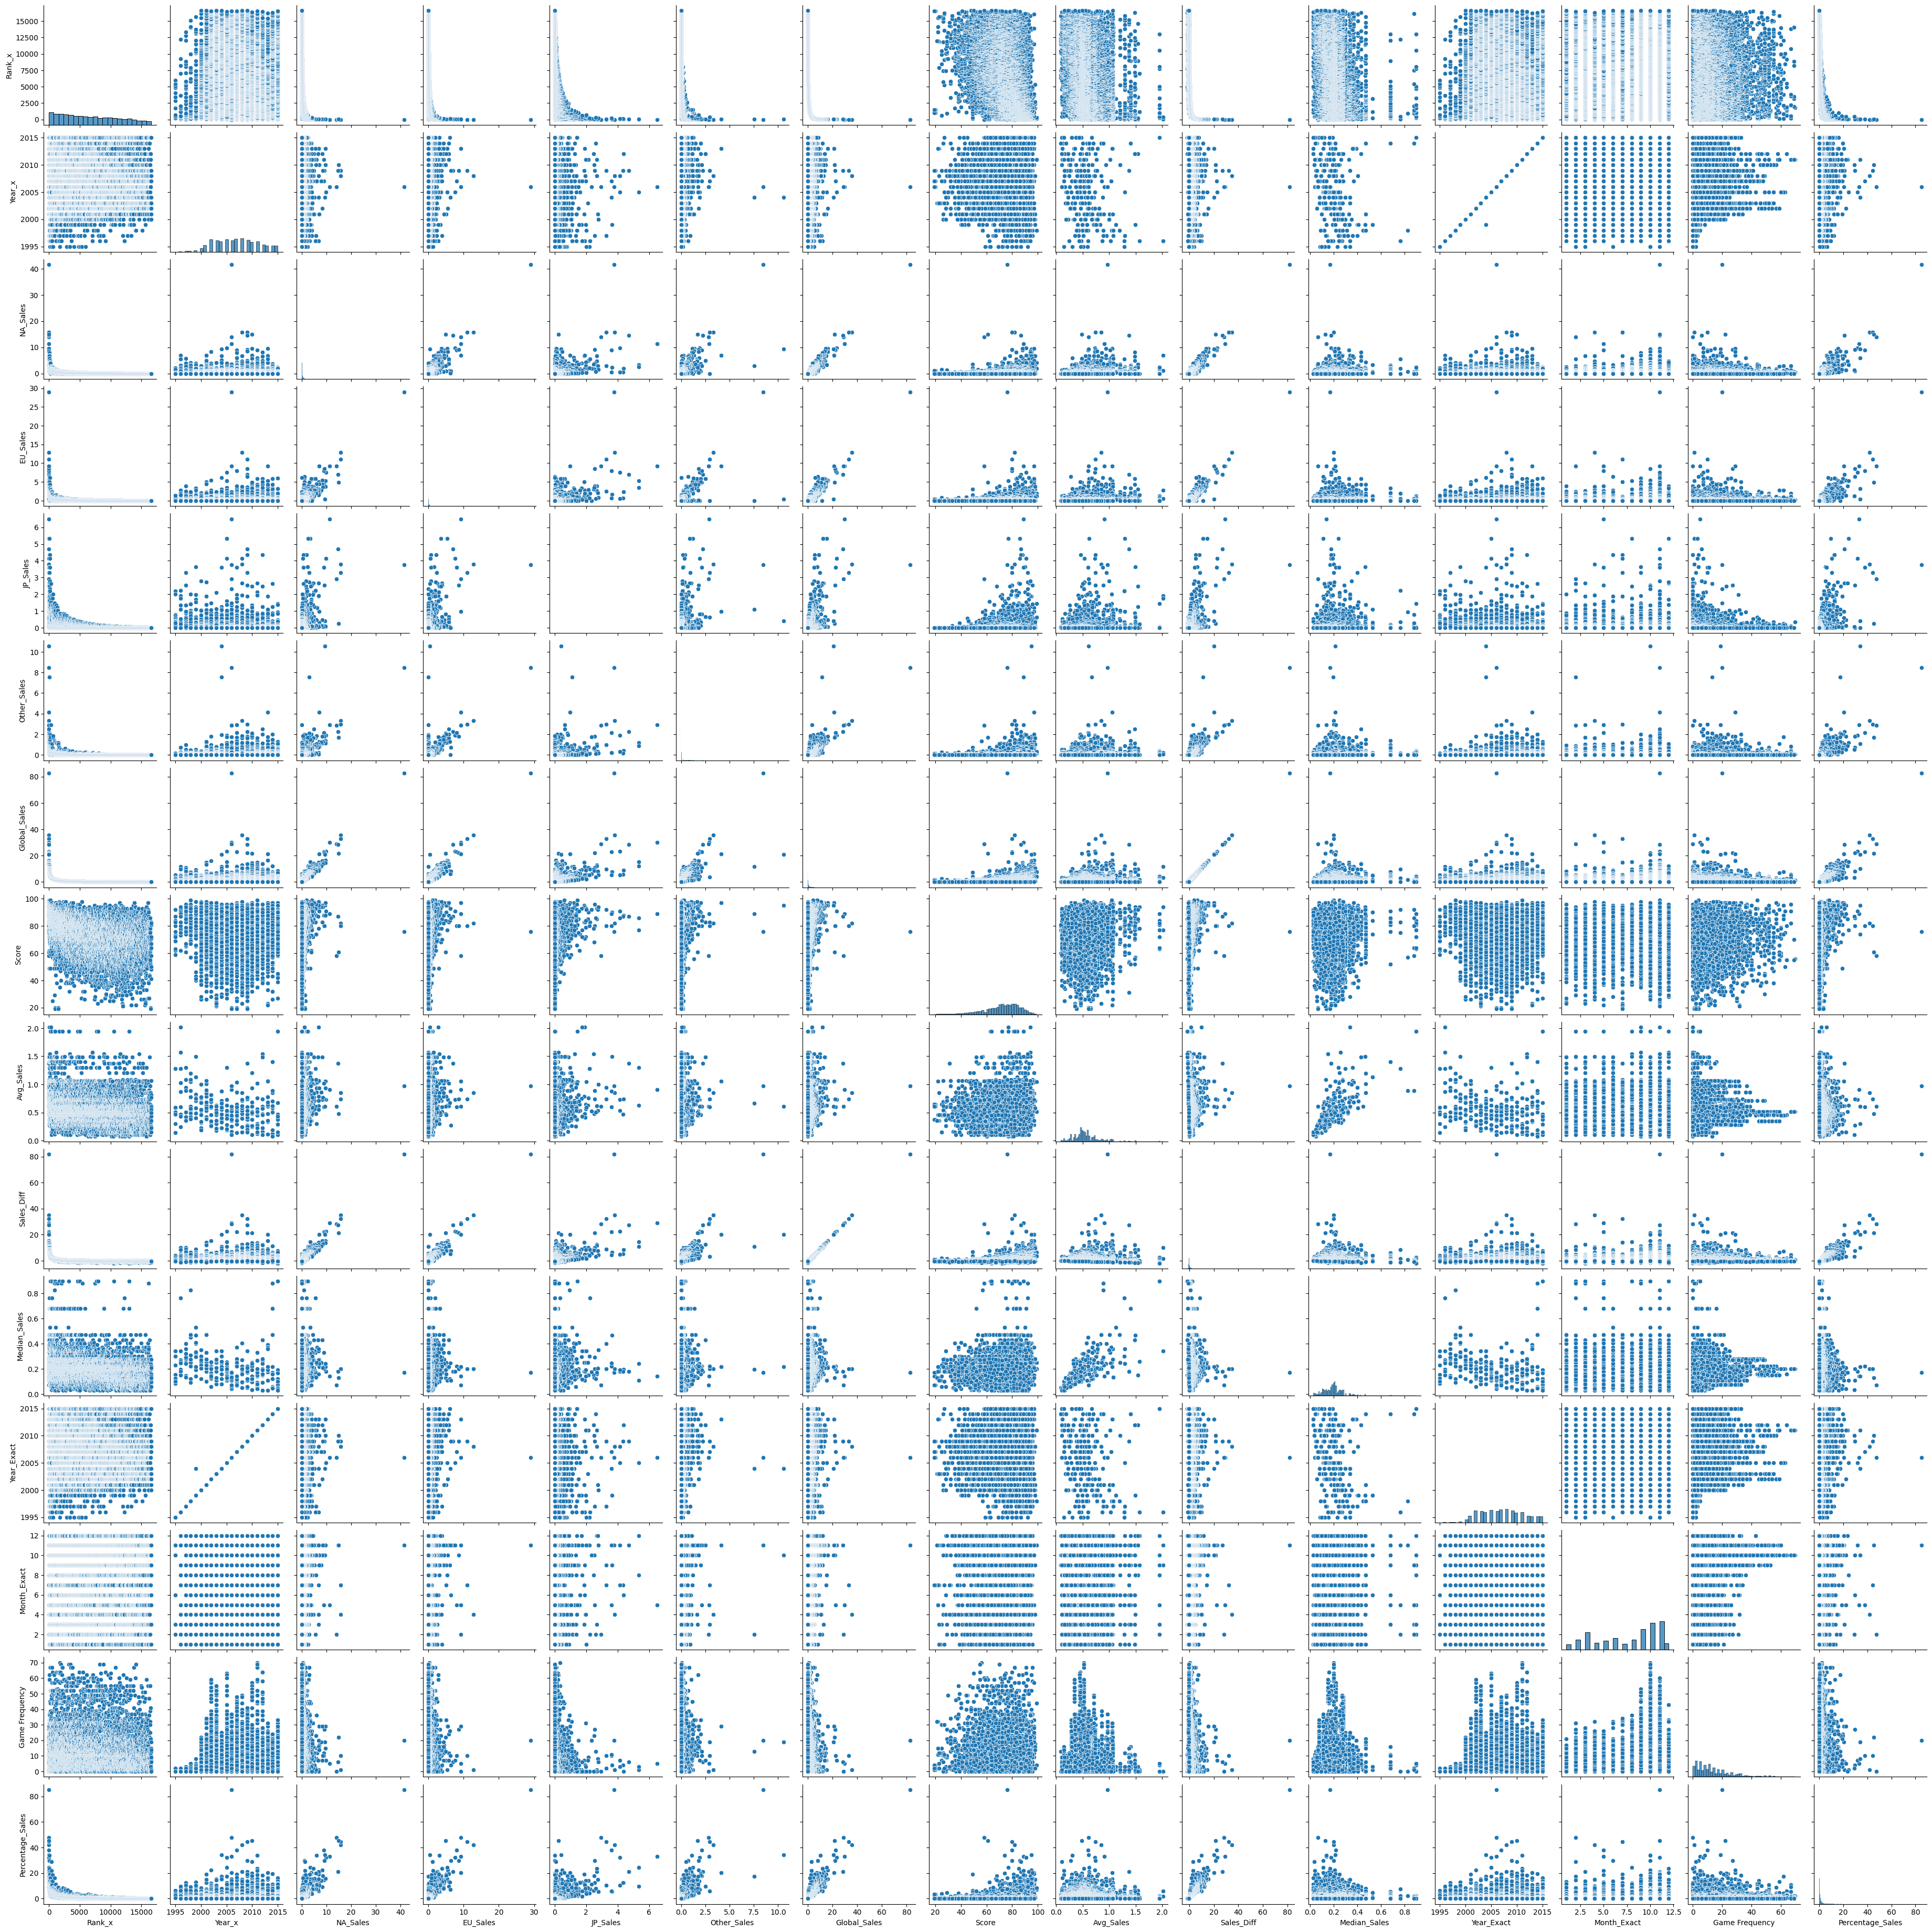

In [191]:
sns.pairplot(df_games_gigcleaned2)

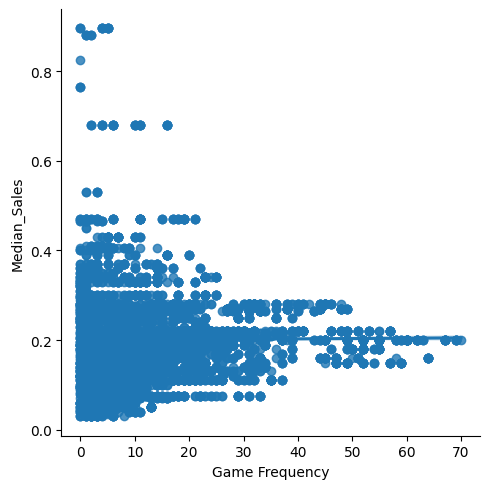

In [193]:
sns.lmplot(x ='Game Frequency', y= 'Median_Sales',data= df_games_gigcleaned2)